In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
client_file_path = '/kaggle/input/powerco/client_data.csv'
client = pd.read_csv(client_file_path)
price_file_path = '/kaggle/input/powerco/price_data.csv'
price = pd.read_csv(price_file_path)

# Analysis of client data

In [3]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [6]:
unique_client = client.nunique()
unique_client

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


channel_sales
MISSING                             3725
epumfxlbckeskwekxbiuasklxalciiuu       3
ewpakwlliwisiwduibdlfmalxowmwpci     893
fixdbufsefwooaasfcxdxadsiekoceaa       2
foosdfpfkusacimwkcsosbicdxkicaua    6754
lmkebamcaaclubfxadlmueccxoimlema    1843
sddiedcslfslkckwlfkdpoeeailfpeds      11
usilxuppasemubllopkaafesmlibmsdf    1375
Name: cons_12m, dtype: int64

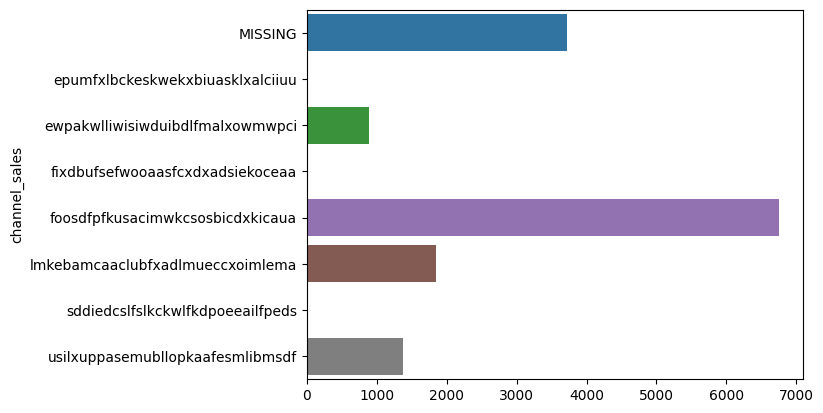

In [7]:
df1 = client.groupby('channel_sales')['cons_12m'].count()
sns.barplot(x=df1.values,y=df1.index)
df1

channel_sales
MISSING                             1.136814e+05
epumfxlbckeskwekxbiuasklxalciiuu    2.307933e+04
ewpakwlliwisiwduibdlfmalxowmwpci    3.833184e+04
fixdbufsefwooaasfcxdxadsiekoceaa    1.254515e+06
foosdfpfkusacimwkcsosbicdxkicaua    9.794777e+04
lmkebamcaaclubfxadlmueccxoimlema    6.384058e+05
sddiedcslfslkckwlfkdpoeeailfpeds    1.740882e+04
usilxuppasemubllopkaafesmlibmsdf    1.962696e+04
Name: cons_12m, dtype: float64

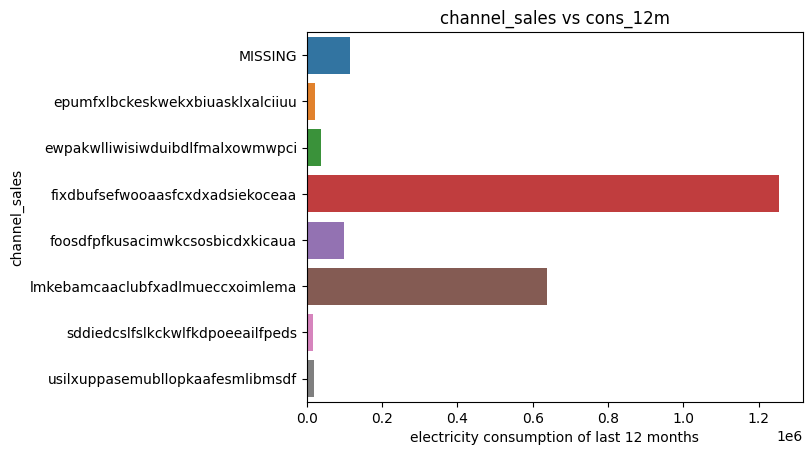

In [8]:
channel_avg_cons = client.groupby('channel_sales')['cons_12m'].mean()
sns.barplot(y=channel_avg_cons.index,x=channel_avg_cons.values)
plt.title('channel_sales vs cons_12m')
plt.xlabel('electricity consumption of last 12 months')
plt.ylabel('channel_sales')
channel_avg_cons

<Axes: xlabel='cons_12m', ylabel='channel_sales'>

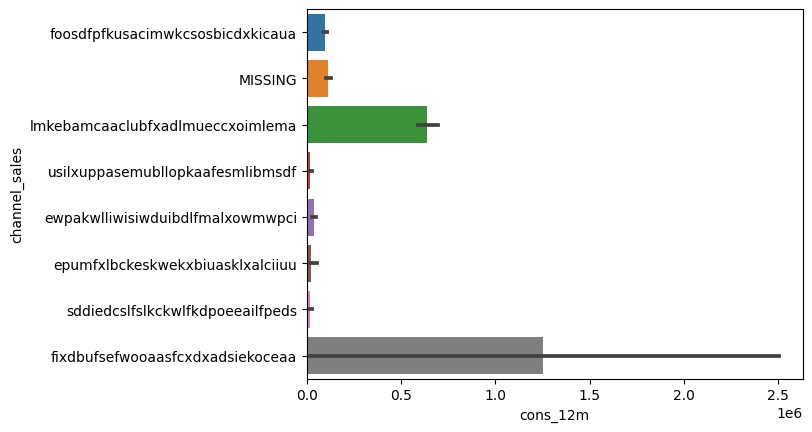

In [9]:
sns.barplot(y=client['channel_sales'],x=client['cons_12m'])

In [10]:
df2 = client.sort_values(by='cons_12m',ascending=False)
bottom_1000_consumer = df2.tail(1000)
bottom_1000_consumer

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
5814,5a07ea64434f67f8d748ab0d91ba190a,MISSING,1920,0,231,2009-11-26,2016-11-26,2009-11-26,2015-11-27,206.06,...,f,25.34,31.89,31.89,1,21.36,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,16.500,0
9865,9fcbeb32f86b29c6f6e7fdbdd7a47bde,foosdfpfkusacimwkcsosbicdxkicaua,1919,0,353,2009-08-01,2016-08-01,2015-06-17,2015-08-03,280.49,...,f,50.45,12.36,12.36,1,22.93,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0
6192,55b44f3df0eedd9ee0c9256ffe282ce1,MISSING,1919,0,740,2010-02-01,2016-02-01,2010-02-01,2015-02-02,136.99,...,f,16.80,51.72,51.72,1,13.72,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,20.700,0
8579,8ef26a39bfb55a9e10cf790e9be91be7,MISSING,1918,0,0,2010-06-07,2016-06-07,2010-06-07,2015-06-10,286.21,...,f,0.00,22.52,22.52,1,28.01,6,ldkssxwpmemidmecebumciepifcamkci,13.856,0
7207,3dc0835c3eb80d5b7754dc1221697b05,lmkebamcaaclubfxadlmueccxoimlema,1917,0,0,2010-06-18,2016-06-18,2010-06-18,2015-06-23,229.45,...,f,0.00,16.92,16.92,1,15.41,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,3c20e52ac31cb5917519ed87cf884bdf,MISSING,0,0,0,2008-11-06,2016-12-31,2008-11-06,2016-01-01,0.00,...,f,0.00,0.12,0.12,1,0.00,7,ldkssxwpmemidmecebumciepifcamkci,40.000,0
4310,25e6dedb8d82fe1e59c80a9edf835725,MISSING,0,5522,0,2009-10-02,2016-10-02,2009-10-02,2015-10-04,0.00,...,t,0.00,8.64,8.64,2,0.00,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,11.500,0
10314,3e6e3711ec836bd8a954112233a30f48,MISSING,0,0,0,2008-07-01,2016-12-31,2008-07-01,2016-01-01,0.00,...,f,0.00,0.24,0.24,1,0.00,8,ldkssxwpmemidmecebumciepifcamkci,100.000,0
12915,56e45000c86136574bc2890c6b2b36c3,usilxuppasemubllopkaafesmlibmsdf,0,0,0,2012-02-01,2016-02-01,2012-02-01,2015-02-02,0.00,...,f,0.00,26.04,26.04,1,0.00,4,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [11]:
bottom_1000_consumer[bottom_1000_consumer['churn']==1]['churn'].count()

105

## out of 1000 least electricity consumer in the last 12 months only 105 have churned

In [12]:
# based on consumption over the last 12 months we have created groups of 1000 consumers each and calculate how many from these groups have churned
# in df2 customers are sorted based on their electricity consumption on the last 12 months('cons_12m')

def churn_count(data,num_group):
    group_size = len(df2)//num_group
    group_count = []
    for i in range(num_group):
        start_index = i*group_size
        end_index = (i+1)*group_size if i< num_group - 1 else len(df2)
        x=df2.iloc[start_index:end_index]
        churned_consumer = x[x['churn']==1]['churn'].sum()
        group_count.append(churned_consumer)
        
    return group_count

churn_count(client,15)

[53, 98, 94, 143, 98, 84, 98, 96, 101, 80, 102, 97, 90, 82, 103]

so customers from every group such as top consumers to least consumers, the churning rate is quite equivalent in all groups

In [13]:
df3= client.sort_values(by='cons_gas_12m',ascending=False)
bottom_1000_gas_cons = df3.tail(1000)
bottom_1000_gas_cons

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
5386,b2cdb1296ec2c446cc6aa7e2ffc3612f,foosdfpfkusacimwkcsosbicdxkicaua,3422,0,0,2012-02-25,2016-02-25,2015-12-17,2015-02-26,517.20,...,f,0.00,28.32,28.32,1,53.37,4,lxidpiddsbxsbosboudacockeimpuepw,11.300,0
5411,b02956492f663b315a6a715342cf6bf9,foosdfpfkusacimwkcsosbicdxkicaua,58594,0,2662,2010-05-11,2016-05-11,2015-04-29,2015-05-14,1568.88,...,f,259.40,45.93,45.93,1,205.91,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,43.300,0
1648,0bcd17af93aa2dc7896b3a296fd15702,ewpakwlliwisiwduibdlfmalxowmwpci,15919,0,4940,2010-08-23,2016-08-23,2010-08-23,2015-08-24,2346.10,...,f,716.53,14.70,14.70,1,174.82,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
5413,46503ade93a31a56ee1a421ca393da58,foosdfpfkusacimwkcsosbicdxkicaua,3176,0,0,2012-10-04,2016-10-04,2015-08-27,2015-10-05,471.36,...,f,0.00,7.80,7.80,1,35.98,3,lxidpiddsbxsbosboudacockeimpuepw,10.390,0
5449,7c5619161c782c71460360a428497398,foosdfpfkusacimwkcsosbicdxkicaua,5836,0,1007,2009-11-13,2016-11-13,2009-11-13,2015-11-17,218.80,...,f,38.40,34.68,34.68,1,21.21,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,532dbbcacd47cddaa3b8ea60e7cbc4cc,foosdfpfkusacimwkcsosbicdxkicaua,2366,0,0,2011-06-13,2016-06-13,2011-06-13,2015-06-23,354.47,...,f,0.00,20.36,20.36,1,39.13,5,lxidpiddsbxsbosboudacockeimpuepw,12.500,0
6415,855099e6e9136d51a951b59911cf3039,foosdfpfkusacimwkcsosbicdxkicaua,20773,0,1546,2012-04-25,2016-04-25,2012-04-25,2015-04-26,1575.50,...,f,123.24,23.88,23.88,1,204.91,4,lxidpiddsbxsbosboudacockeimpuepw,19.800,0
1478,c770b25baa47192f9ec2f2ceb441d7b8,lmkebamcaaclubfxadlmueccxoimlema,7414,0,0,2009-10-21,2016-09-12,2013-09-12,2015-09-13,699.96,...,f,0.00,10.08,10.08,1,59.79,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.392,0
6417,e30ca48e2aeede322a328db03a543bad,lmkebamcaaclubfxadlmueccxoimlema,964043,0,65969,2011-02-18,2016-02-18,2011-02-18,2015-02-20,5628.37,...,f,466.49,32.64,32.64,1,430.71,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,14.500,0


In [14]:
data_1 = client.groupby('forecast_discount_energy')['churn'].value_counts()
discount_consumer = client[client['forecast_discount_energy']>0]
print(discount_consumer['forecast_discount_energy'].value_counts())
print(discount_consumer[discount_consumer['churn']==1]['forecast_discount_energy'].value_counts())

forecast_discount_energy
30.0    260
28.0    102
24.0     83
22.0     47
25.0      7
26.0      5
19.0      2
17.0      2
23.0      2
10.0      1
5.0       1
Name: count, dtype: int64
forecast_discount_energy
30.0    30
28.0    15
24.0     9
22.0     7
10.0     1
25.0     1
23.0     1
Name: count, dtype: int64


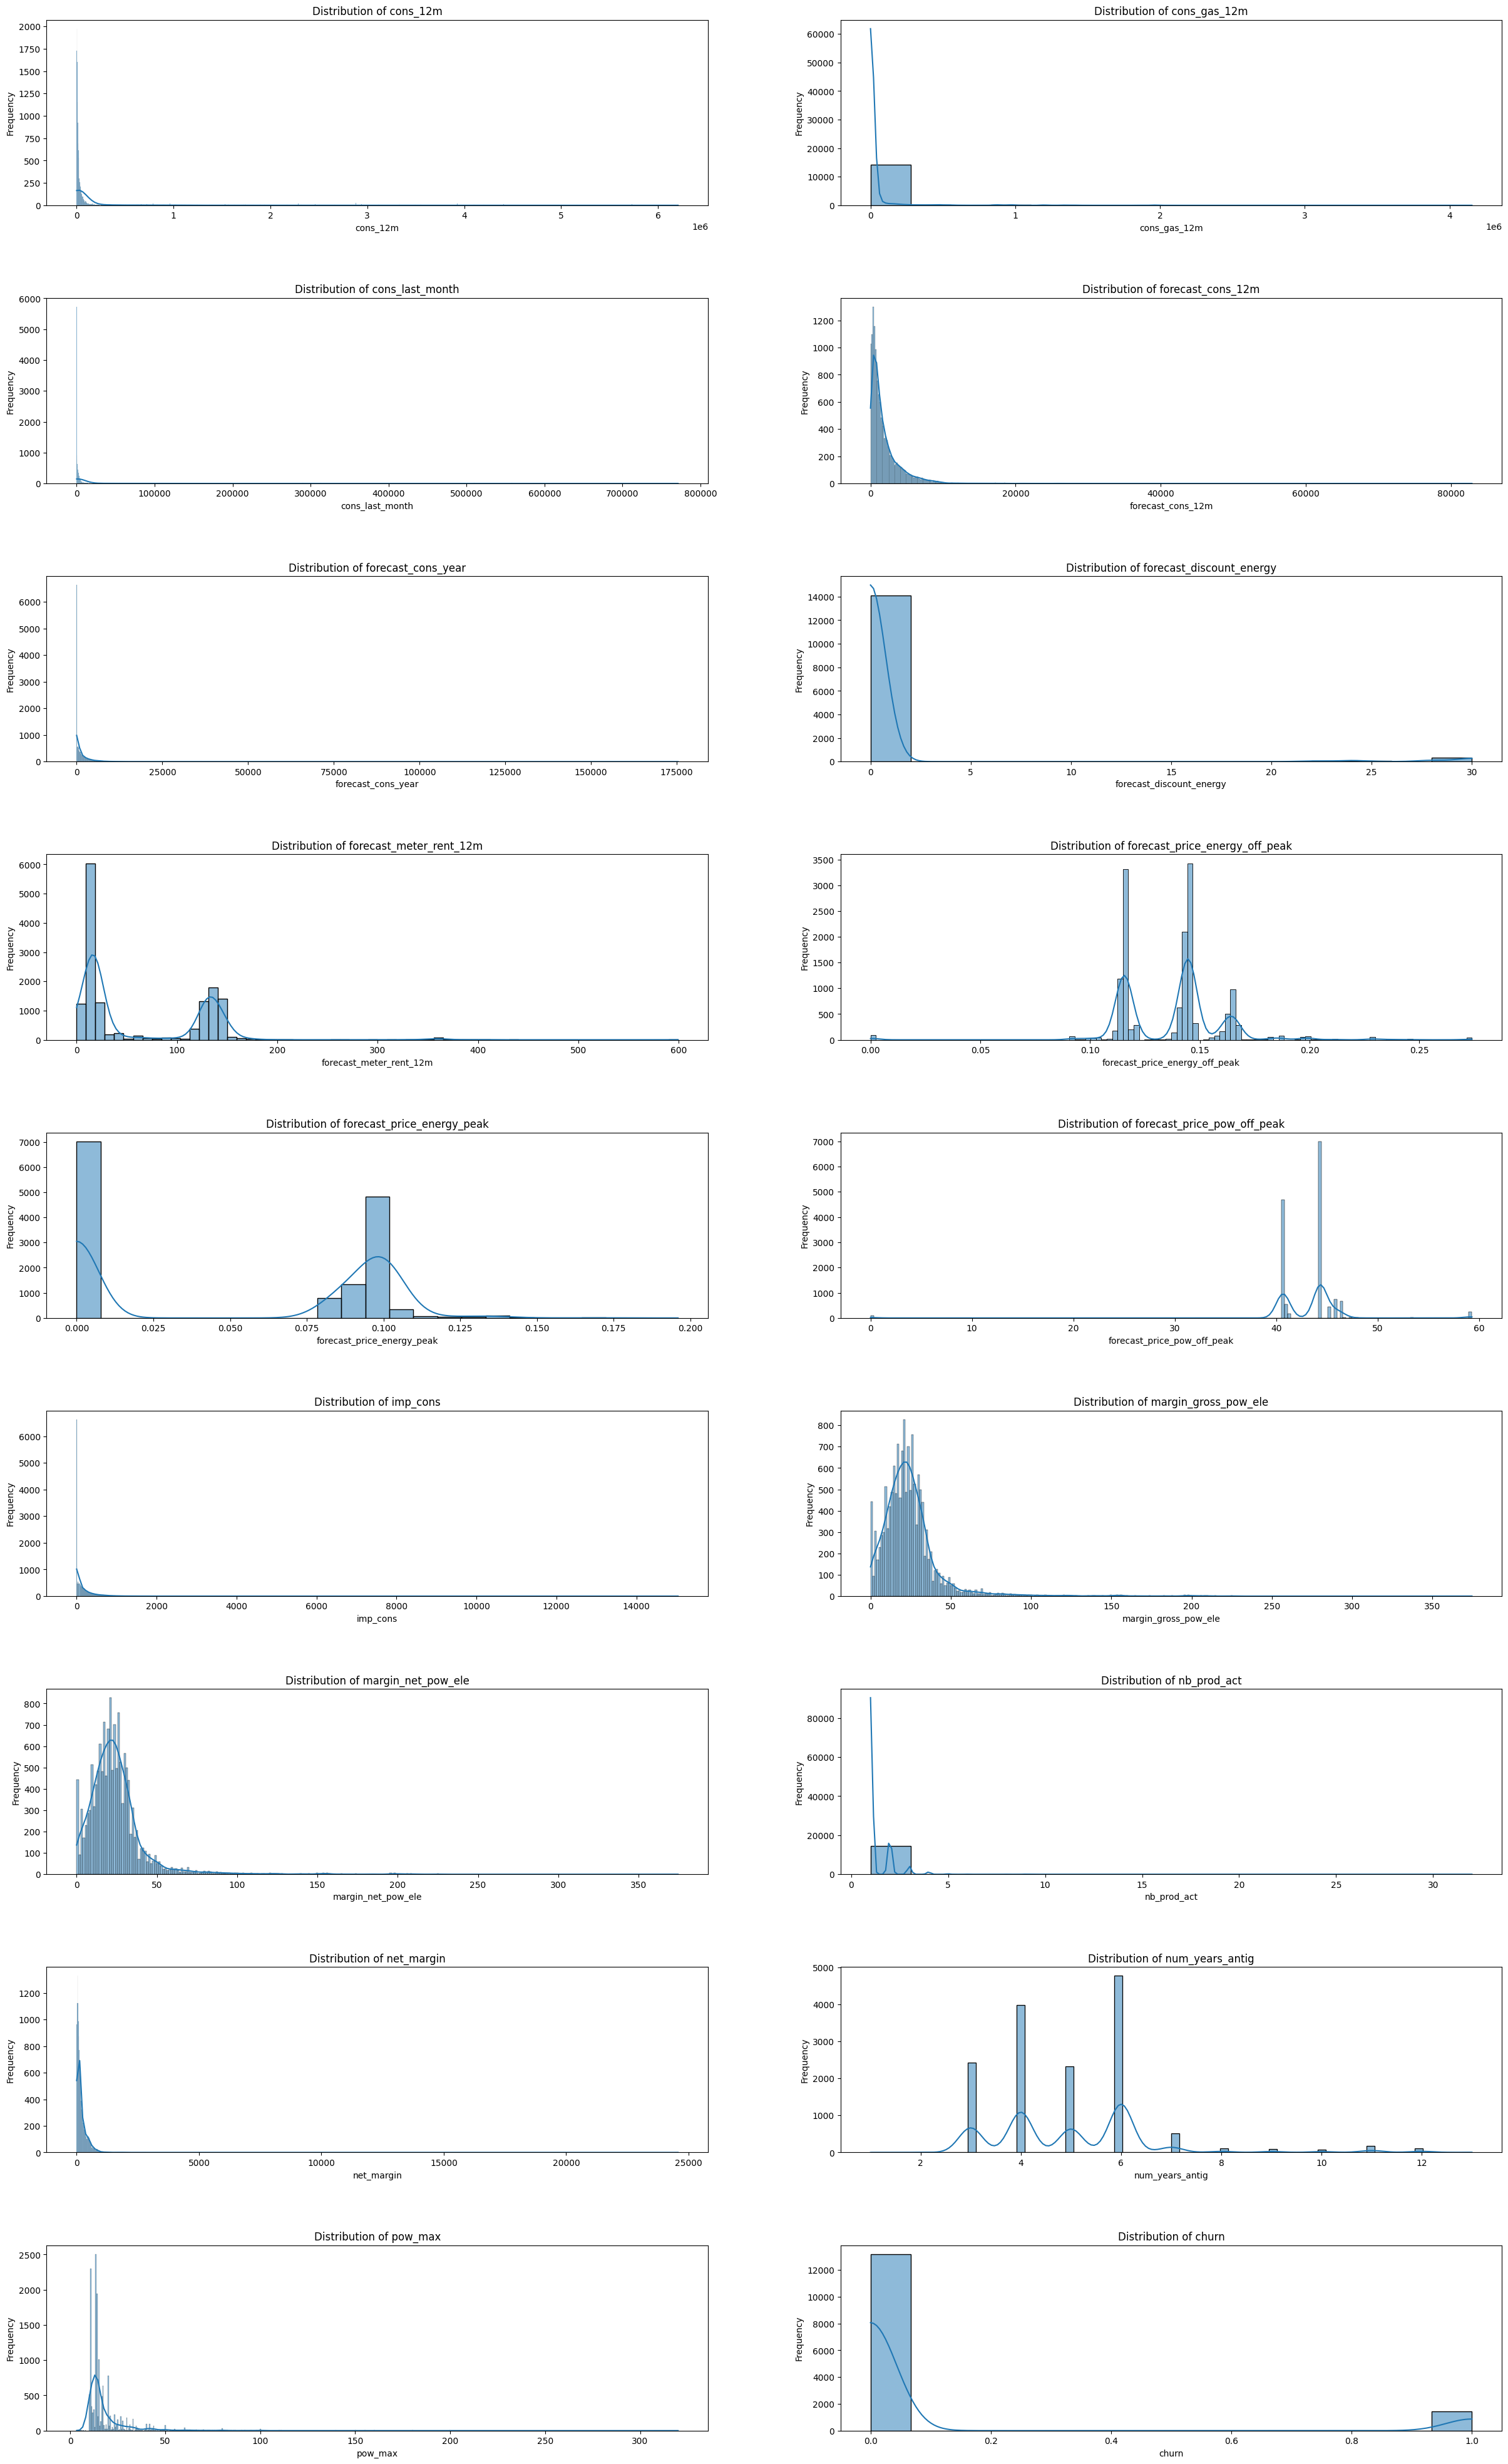

In [15]:
numerical_columns = client.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(30, 50))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns.columns):
    plt.subplot(9, 2, i + 1)  # 3 rows, 2 columns
    sns.histplot(data=numerical_columns, x=column, kde=True,fill=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

array([[<Axes: title={'center': 'cons_12m'}>,
        <Axes: title={'center': 'cons_gas_12m'}>,
        <Axes: title={'center': 'cons_last_month'}>,
        <Axes: title={'center': 'forecast_cons_12m'}>],
       [<Axes: title={'center': 'forecast_cons_year'}>,
        <Axes: title={'center': 'forecast_discount_energy'}>,
        <Axes: title={'center': 'forecast_meter_rent_12m'}>,
        <Axes: title={'center': 'forecast_price_energy_off_peak'}>],
       [<Axes: title={'center': 'forecast_price_energy_peak'}>,
        <Axes: title={'center': 'forecast_price_pow_off_peak'}>,
        <Axes: title={'center': 'imp_cons'}>,
        <Axes: title={'center': 'margin_gross_pow_ele'}>],
       [<Axes: title={'center': 'margin_net_pow_ele'}>,
        <Axes: title={'center': 'nb_prod_act'}>,
        <Axes: title={'center': 'net_margin'}>,
        <Axes: title={'center': 'num_years_antig'}>],
       [<Axes: title={'center': 'pow_max'}>,
        <Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >

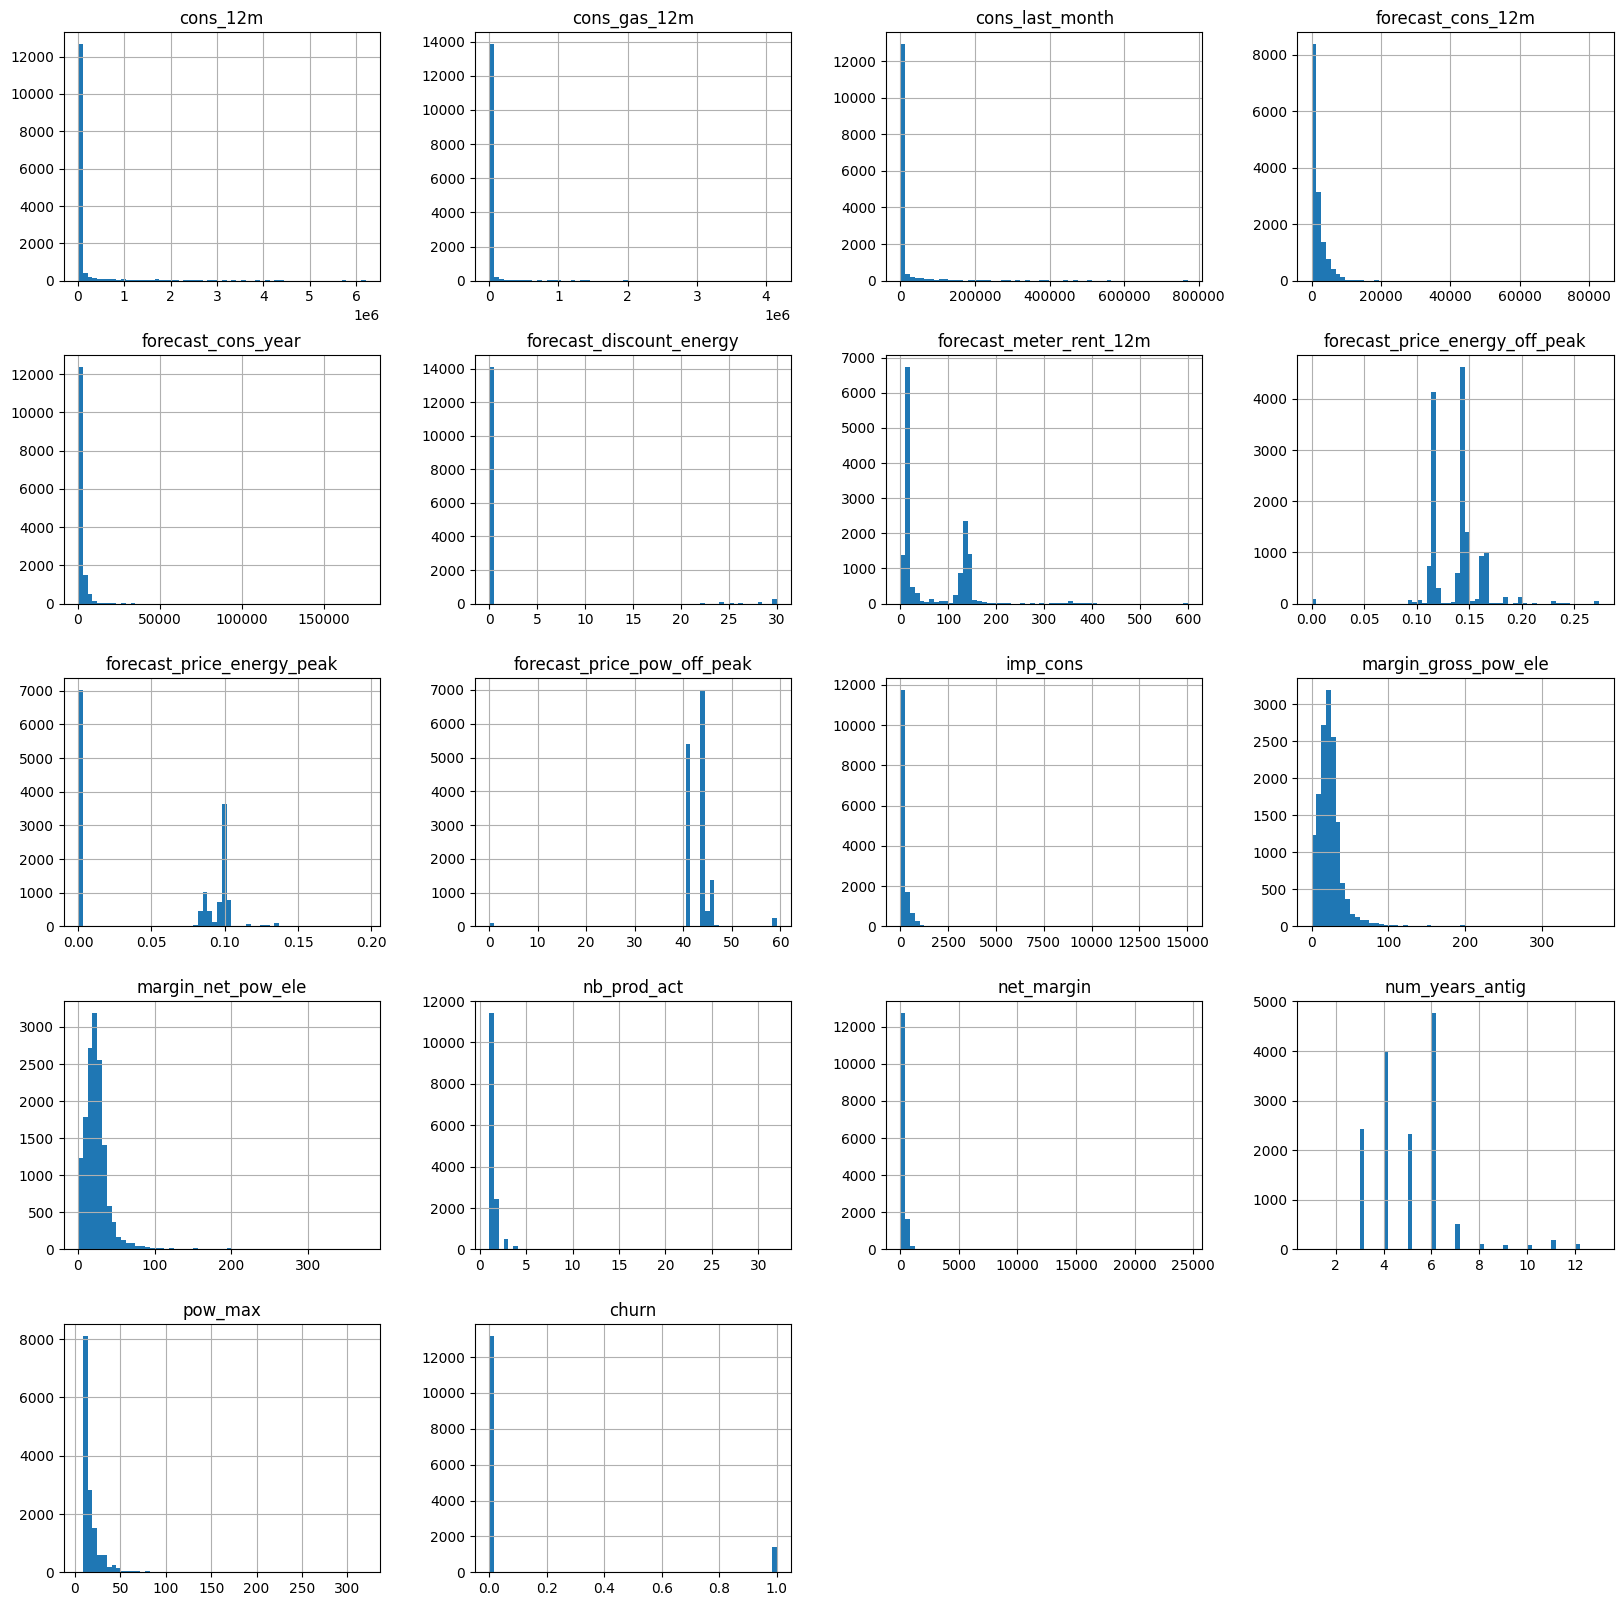

In [16]:
client.hist(
    bins=60, figsize=(20,20)
)

In [17]:
loyal_customer_1000 = client.sort_values(by='num_years_antig',ascending=False)
loyal_customer_1000.head(1000)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
2015,07abde2ff11ad3fb443963c17b333ef5,MISSING,44665,42649,3305,2003-05-09,2016-05-09,2003-05-09,2015-05-11,4011.00,...,t,315.89,55.80,55.80,2,519.10,13,ldkssxwpmemidmecebumciepifcamkci,46.200,0
10250,d7489cc75a561f91af1b5e1635f587c3,MISSING,56390,39312,6454,2003-07-17,2016-07-17,2003-07-17,2015-07-19,5679.39,...,t,635.58,12.70,12.70,3,527.59,13,ldkssxwpmemidmecebumciepifcamkci,26.400,0
14282,3c3bfc2e2520538f758f22cd44db274a,MISSING,40047,0,2563,2003-07-14,2016-07-14,2003-07-14,2015-07-15,3927.13,...,f,240.61,32.01,32.01,1,471.48,13,ldkssxwpmemidmecebumciepifcamkci,41.500,0
13760,87a87579c920ebcbaf4ccdb3f7db62d5,MISSING,41791,0,3440,2003-07-03,2016-07-03,2003-07-03,2015-07-04,4322.28,...,f,336.63,12.72,12.72,1,481.81,13,ldkssxwpmemidmecebumciepifcamkci,16.500,0
4431,60bdfb5dce845441972098b75cb9984f,MISSING,16815,0,1638,2003-06-11,2016-06-11,2003-06-11,2015-06-23,1811.46,...,f,170.87,18.12,18.12,1,198.77,13,ldkssxwpmemidmecebumciepifcamkci,19.800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1c55c6785645c643d564dd59ff96204b,MISSING,7066,0,0,2009-06-13,2016-06-13,2009-06-13,2015-06-23,1059.18,...,f,0.00,21.52,21.52,1,103.87,7,ldkssxwpmemidmecebumciepifcamkci,13.200,0
13921,d1100bf472445847604206679dfe9177,foosdfpfkusacimwkcsosbicdxkicaua,7034,0,660,2009-07-21,2016-07-21,2015-01-09,2015-07-30,1107.55,...,f,87.84,18.62,18.62,1,96.34,7,ldkssxwpmemidmecebumciepifcamkci,13.200,0
14213,db5ea77f2133960bee3df2cef82613a7,MISSING,142675,0,28360,2009-07-23,2016-07-23,2009-07-23,2015-07-27,2506.64,...,f,386.90,16.66,16.66,1,225.71,7,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
6637,a81eae649ee263caf8a1ef0e7c31d644,MISSING,2509,0,0,2009-06-09,2016-06-09,2009-06-09,2015-06-23,376.45,...,f,0.00,16.92,16.92,1,37.70,7,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [18]:
correlation = client['forecast_cons_12m'].corr(client['churn'])
correlation

0.012949245805949581

In [19]:
# customer's interaction with the company(in years) and the number of customer churned 
client.groupby('num_years_antig')['churn'].count()

num_years_antig
1        1
2       11
3     2433
4     3982
5     2317
6     4769
7      509
8      103
9       92
10      81
11     185
12     110
13      13
Name: churn, dtype: int64

In [20]:
churn_dist = client['churn'].value_counts()
churn_rate = churn_dist/client['churn'].count()
print(churn_dist)
print(churn_rate)

churn
0    13187
1     1419
Name: count, dtype: int64
churn
0    0.902848
1    0.097152
Name: count, dtype: float64


9.72 % of customers have churned 

In [21]:
churned_summary = client[client['churn']==1]['num_years_antig'].describe()
churned_summary

count    1419.000000
mean        4.633545
std         1.531853
min         2.000000
25%         4.000000
50%         4.000000
75%         6.000000
max        13.000000
Name: num_years_antig, dtype: float64

75 % of customers churned are likely to churn in the 1st 6 years of 1st subscription

In [22]:
non_churned_summary = client[client['churn']== 0]['num_years_antig'].describe()
non_churned_summary

count    13187.000000
mean         5.037006
std          1.615279
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         13.000000
Name: num_years_antig, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='cons_12m'>

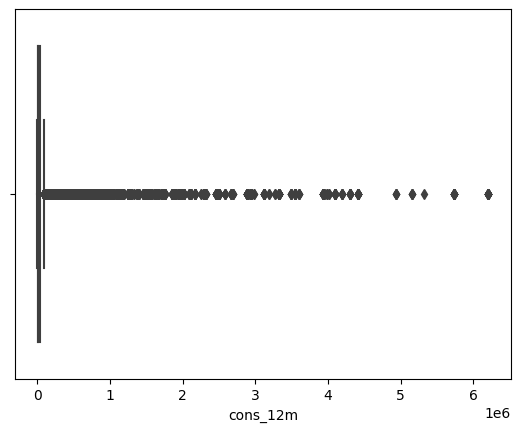

In [23]:
sns.boxplot(x=client['cons_12m'],orient='v')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='forecast_cons_12m'>

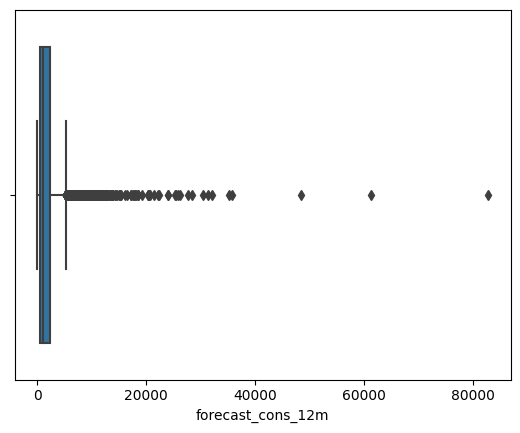

In [24]:
sns.boxplot(x=client['forecast_cons_12m'],orient='v')

In [25]:
el_con = client[client['has_gas']=='f']['churn'].value_counts()
el_con

churn
0    10753
1     1202
Name: count, dtype: int64

most of the electricity consumers have churned in the past compared to the gas consumer

In [26]:
gas_con = client[client['has_gas']=='t']['churn'].value_counts()
gas_con

churn
0    2434
1     217
Name: count, dtype: int64

<Axes: >

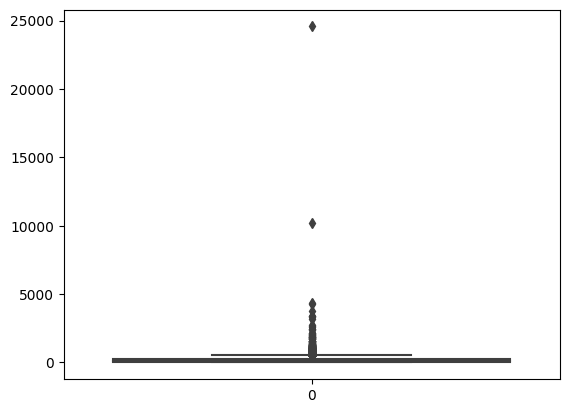

In [27]:
client['net_margin'].describe()
sns.boxplot(data=client['net_margin'])

<Axes: xlabel='cons_12m', ylabel='forecast_cons_12m'>

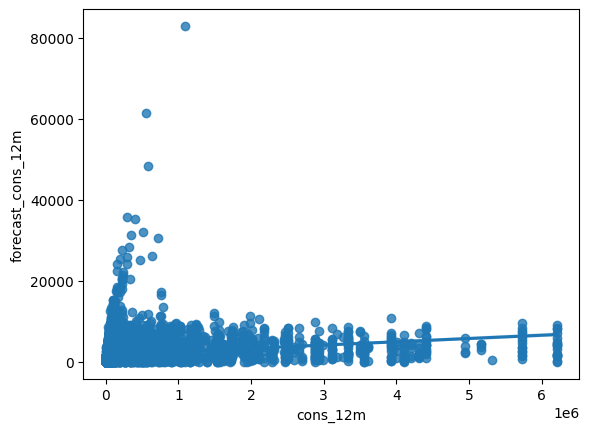

In [28]:
client['cons_12m'].corr(client['forecast_cons_12m'])
sns.regplot(x=client['cons_12m'],y=client['forecast_cons_12m'])

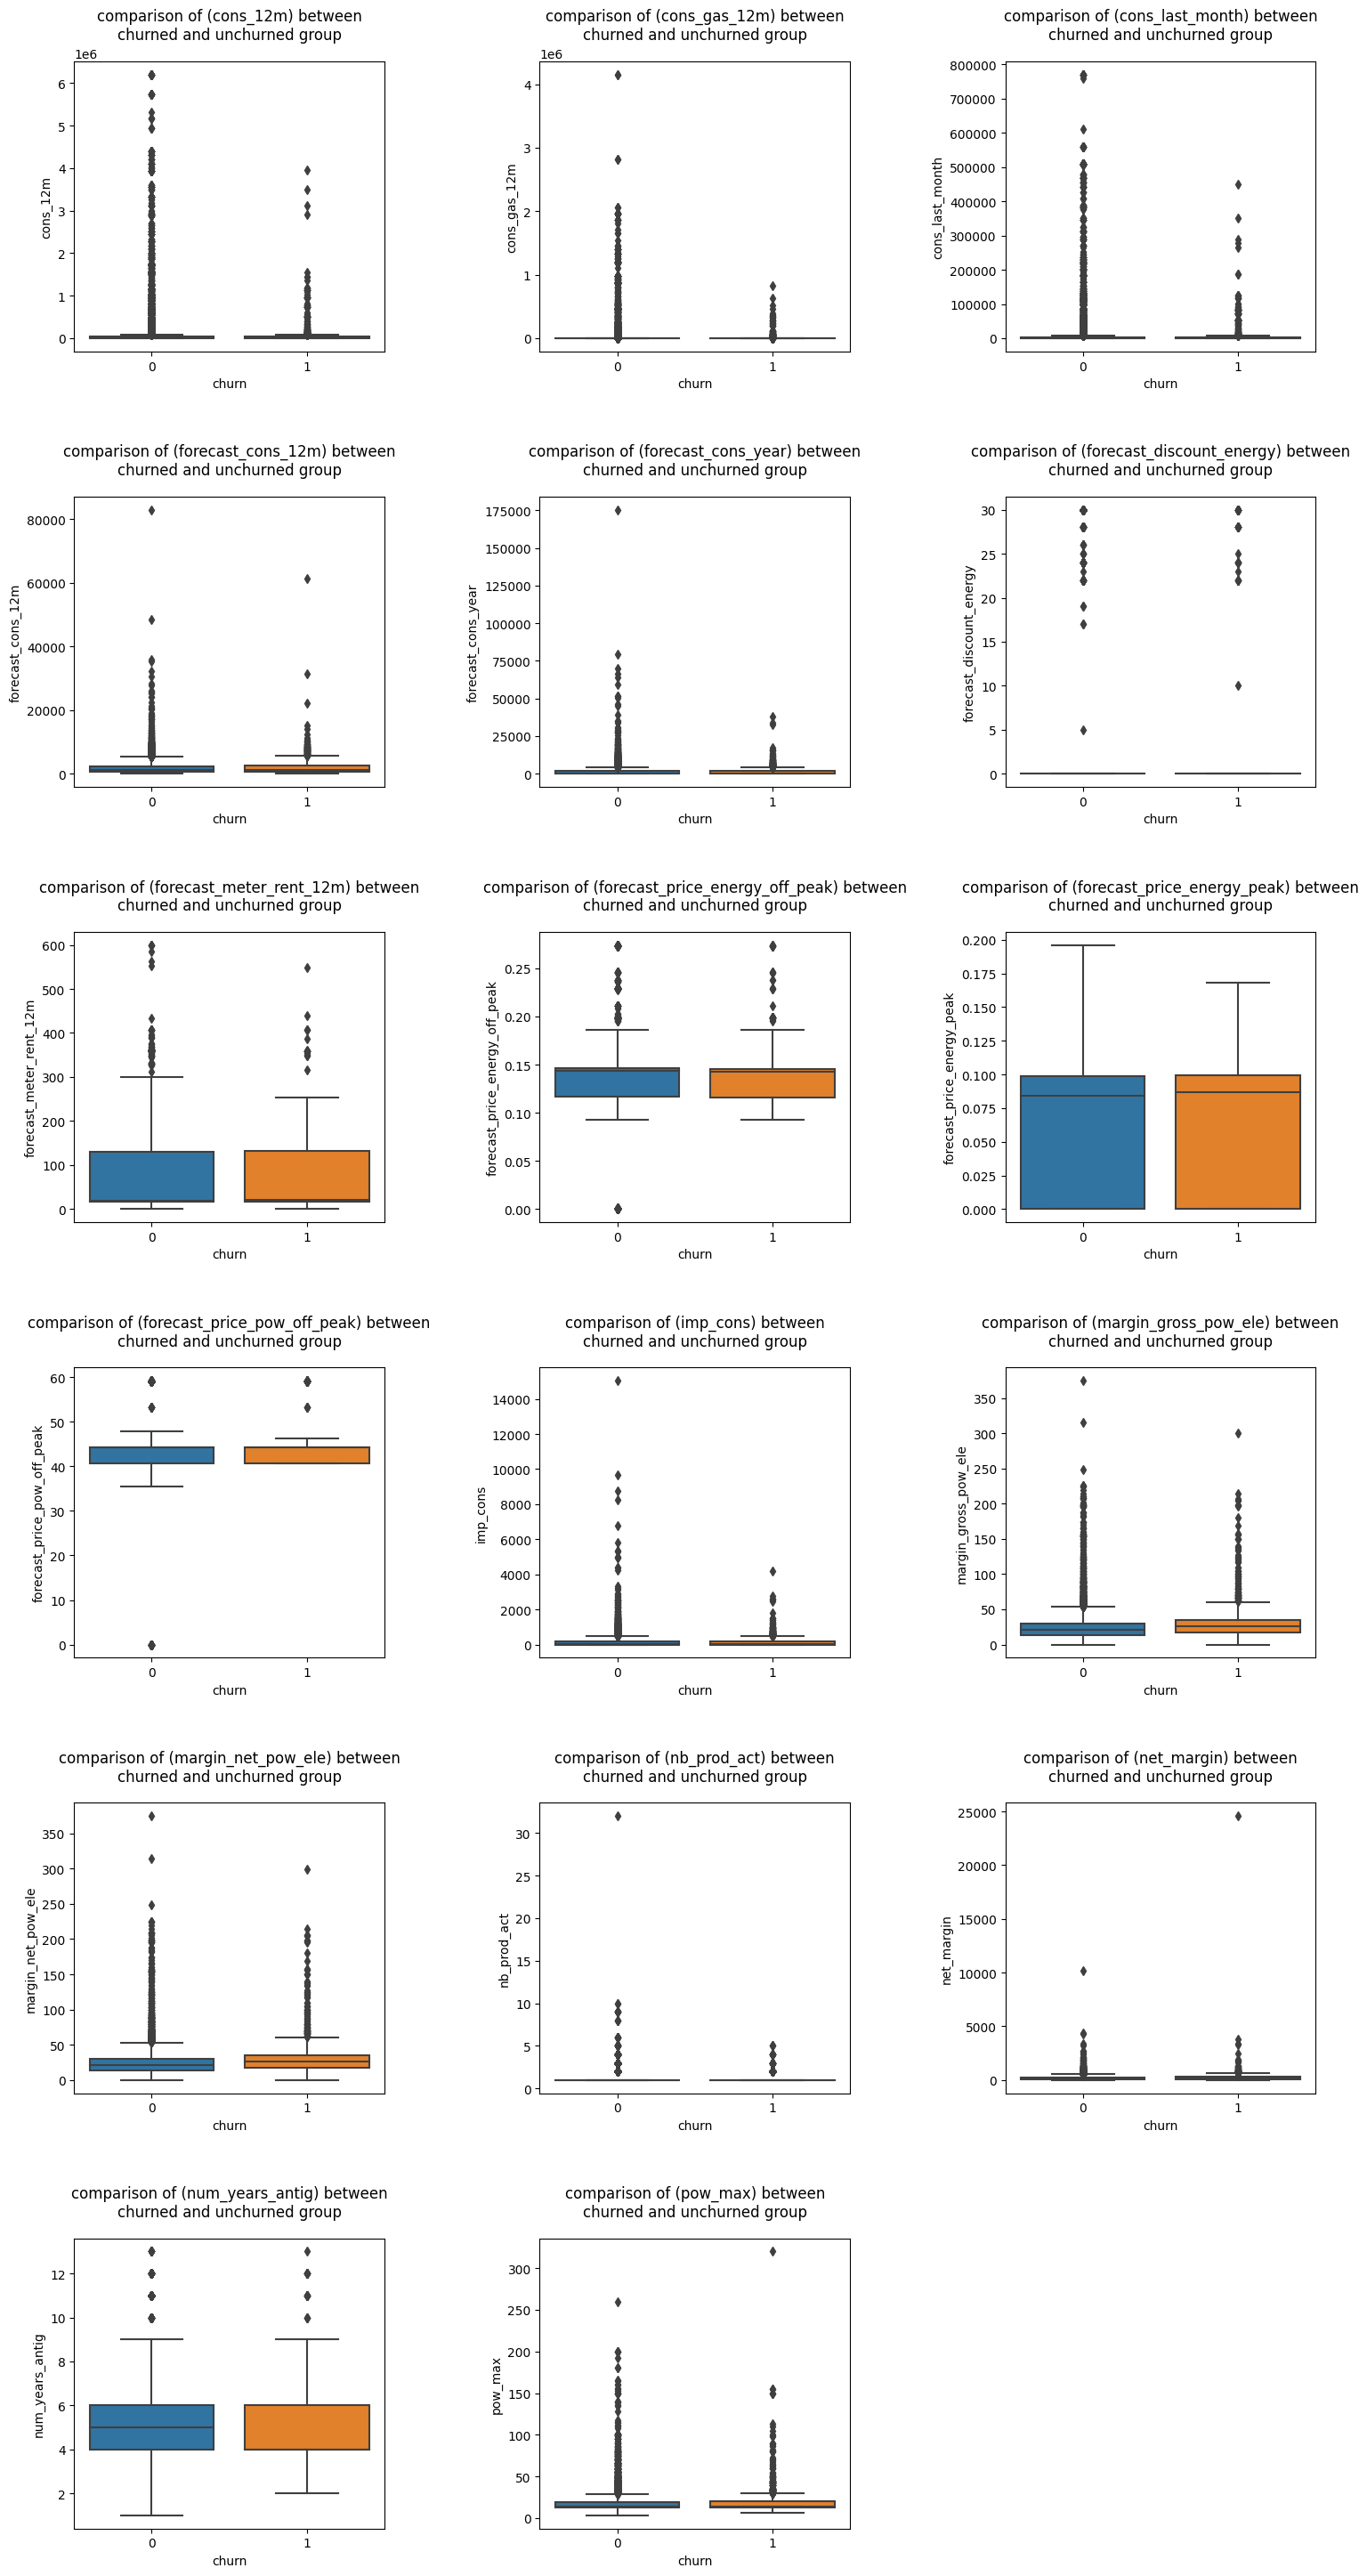

In [29]:
client_numerical_columns = client.select_dtypes(include=['int64','float64']).columns
client_numerical_columns=client_numerical_columns.drop('churn')
client_numerical_columns
total_cols = len(client_numerical_columns)
rows = (total_cols//3)+1
plt.figure(figsize=(18,6*rows))
for i,col in enumerate(client_numerical_columns):
    plt.subplot(rows,3,i+1)
    sns.boxplot(x=client['churn'],y=client[col])
    plt.title('comparison of (' + col + ') between\nchurned and unchurned group',y=1.05)
    plt.subplots_adjust(wspace=0.5)
    plt.subplots_adjust(hspace=0.5)

<Axes: xlabel='cons_12m', ylabel='net_margin'>

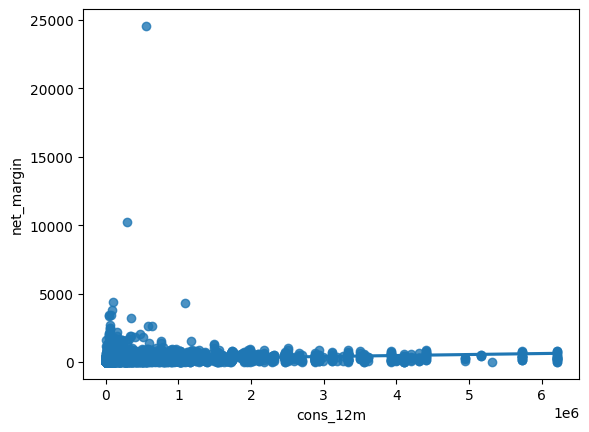

In [30]:
sns.regplot(x=client['cons_12m'],y=client['net_margin'])

<Axes: xlabel='cons_12m', ylabel='margin_gross_pow_ele'>

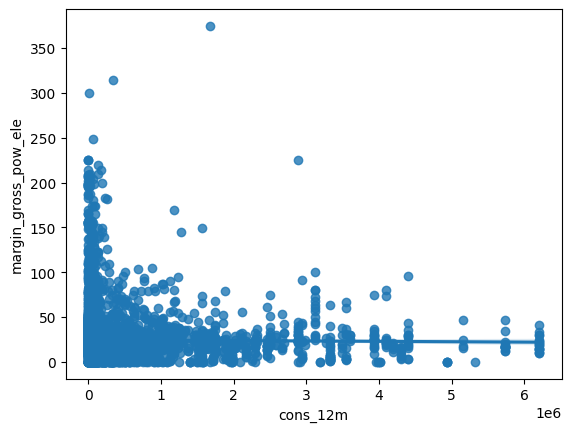

In [31]:
sns.regplot(x=client['cons_12m'],y=client['margin_gross_pow_ele'])

end_year  end_month
2016      1             11
          2            149
          3            124
          4             94
          5            108
          6            143
          7             89
          8            111
          9             98
          10           139
          11           143
          12           109
2017      1            101
Name: id, dtype: int64
end_year
2016    1318
2017     101
Name: id, dtype: int64


Text(0, 0.5, 'number of customer churned')

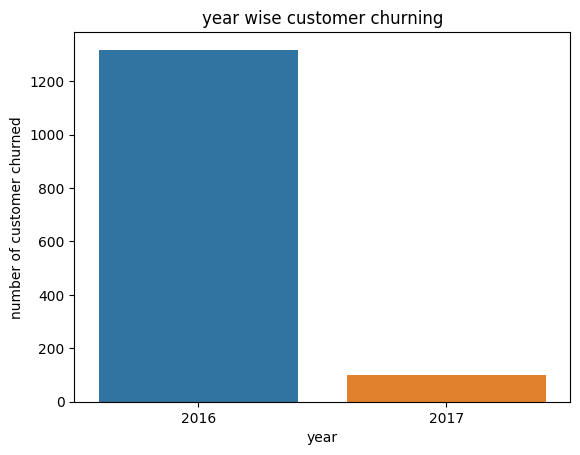

In [32]:
client['date_end'] = pd.to_datetime(client['date_end'])
client['end_year'] = client['date_end'].dt.year
client['end_month'] = client['date_end'].dt.month
print(client[client['churn']==1].groupby(['end_year','end_month'])['id'].count())
year_wise_churning = client[client['churn']==1].groupby('end_year')['id'].count()
print(year_wise_churning)
sns.barplot(x=year_wise_churning.index,y=year_wise_churning.values)
plt.title('year wise customer churning')
plt.xlabel('year')
plt.ylabel('number of customer churned')

sub_year
2003      39
2004     137
2005     189
2006      36
2007      95
2008     124
2009    2690
2010    3609
2011    2758
2012    3704
2013    1224
2014       1
Name: id, dtype: int64


<Axes: xlabel='sub_year'>

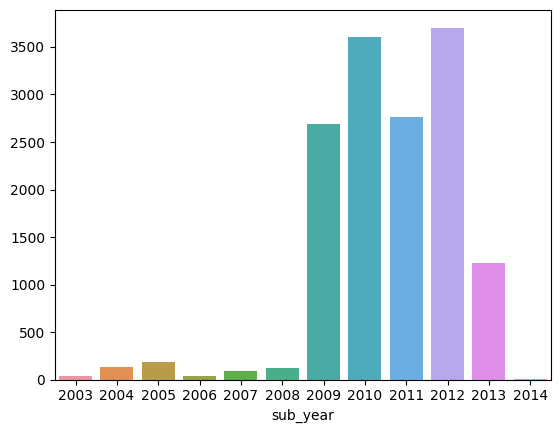

In [33]:
client['date_activ'] = pd.to_datetime(client['date_activ'])
client['date_renewal'] = pd.to_datetime(client['date_renewal'])
client['sub_year'] = client['date_activ'].dt.year
client['sub_month'] = client['date_activ'].dt.month
year_wise_customer = client.groupby(['sub_year'])['id'].count()
print(year_wise_customer)
sns.barplot(x=year_wise_customer.index,y=year_wise_customer.values)

<Axes: xlabel='forecast_meter_rent_12m', ylabel='forecast_price_pow_off_peak'>

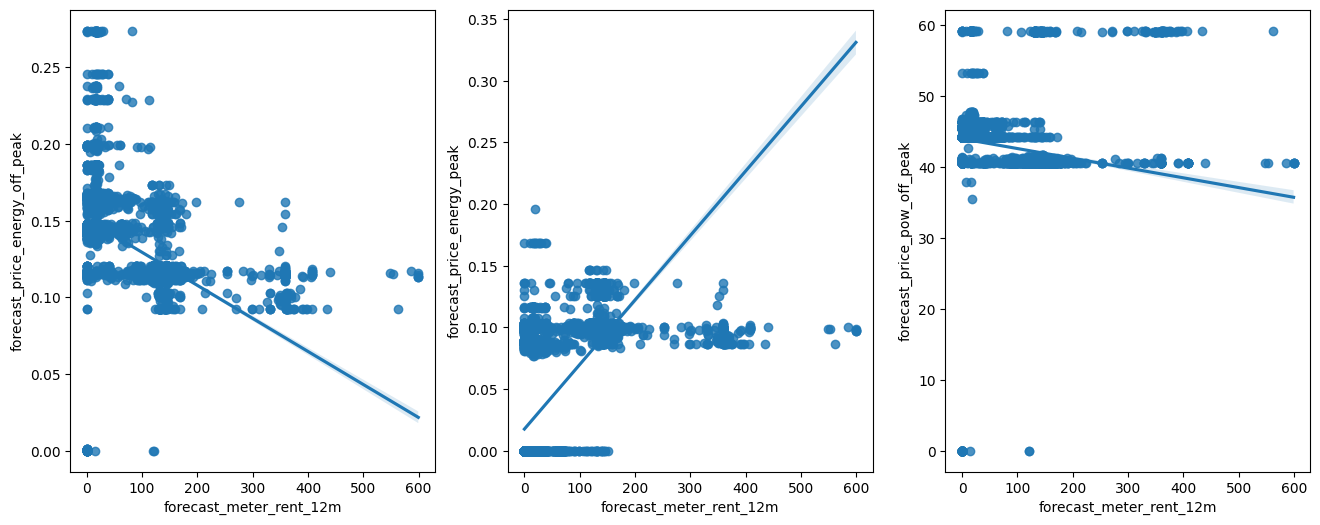

In [34]:
client['forecast_meter_rent_12m'].corr(client['forecast_price_energy_peak'])
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.regplot(x=client['forecast_meter_rent_12m'],y=client['forecast_price_energy_off_peak'])
plt.subplot(1,3,2)
sns.regplot(x=client['forecast_meter_rent_12m'],y=client['forecast_price_energy_peak'])
plt.subplot(1,3,3)
sns.regplot(x=client['forecast_meter_rent_12m'],y=client['forecast_price_pow_off_peak'])

The company has acquired most of its customer during 2009 to 2013

In [35]:
customer_2016 = client[client['end_year'] == 2016]
customer_2016[customer_2016['churn']==1]['id'].count()

1318

# EDA for price_data

In [36]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [37]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [38]:
price.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01')])

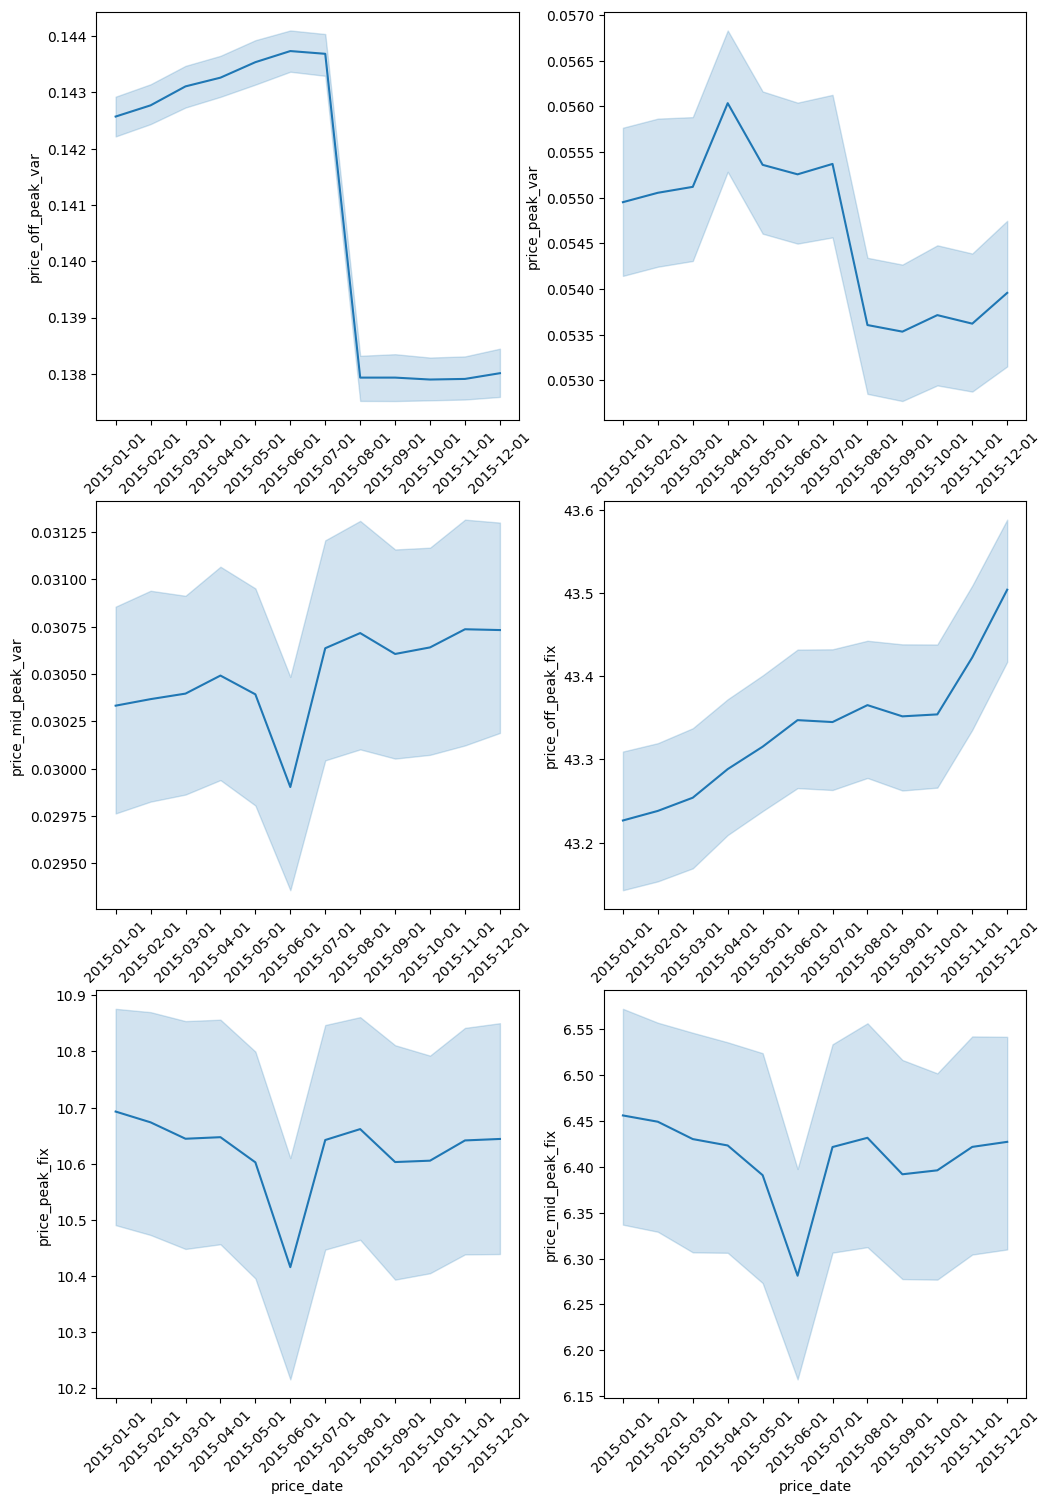

In [39]:
plt.figure(figsize=(12,18))
plt.subplot(3,2,1)
sns.lineplot(data=price,x=price['price_date'],y=price['price_off_peak_var'])
plt.xticks(rotation=45)
plt.subplot(3,2,2)
sns.lineplot(data=price,x=price['price_date'],y=price['price_peak_var'])
plt.xticks(rotation=45)
plt.subplot(3,2,3)
sns.lineplot(data=price,x=price['price_date'],y=price['price_mid_peak_var'])
plt.xticks(rotation=45)
plt.subplot(3,2,4)
sns.lineplot(data=price,x=price['price_date'],y=price['price_off_peak_fix'])
plt.xticks(rotation=45)
plt.subplot(3,2,5)
sns.lineplot(data=price,x=price['price_date'],y=price['price_peak_fix'])
plt.xticks(rotation=45)
plt.subplot(3,2,6)
sns.lineplot(data=price,x=price['price_date'],y=price['price_mid_peak_fix'])
plt.xticks(rotation=45)

array([[<Axes: title={'center': 'price_off_peak_var'}>,
        <Axes: title={'center': 'price_peak_var'}>],
       [<Axes: title={'center': 'price_mid_peak_var'}>,
        <Axes: title={'center': 'price_off_peak_fix'}>],
       [<Axes: title={'center': 'price_peak_fix'}>,
        <Axes: title={'center': 'price_mid_peak_fix'}>]], dtype=object)

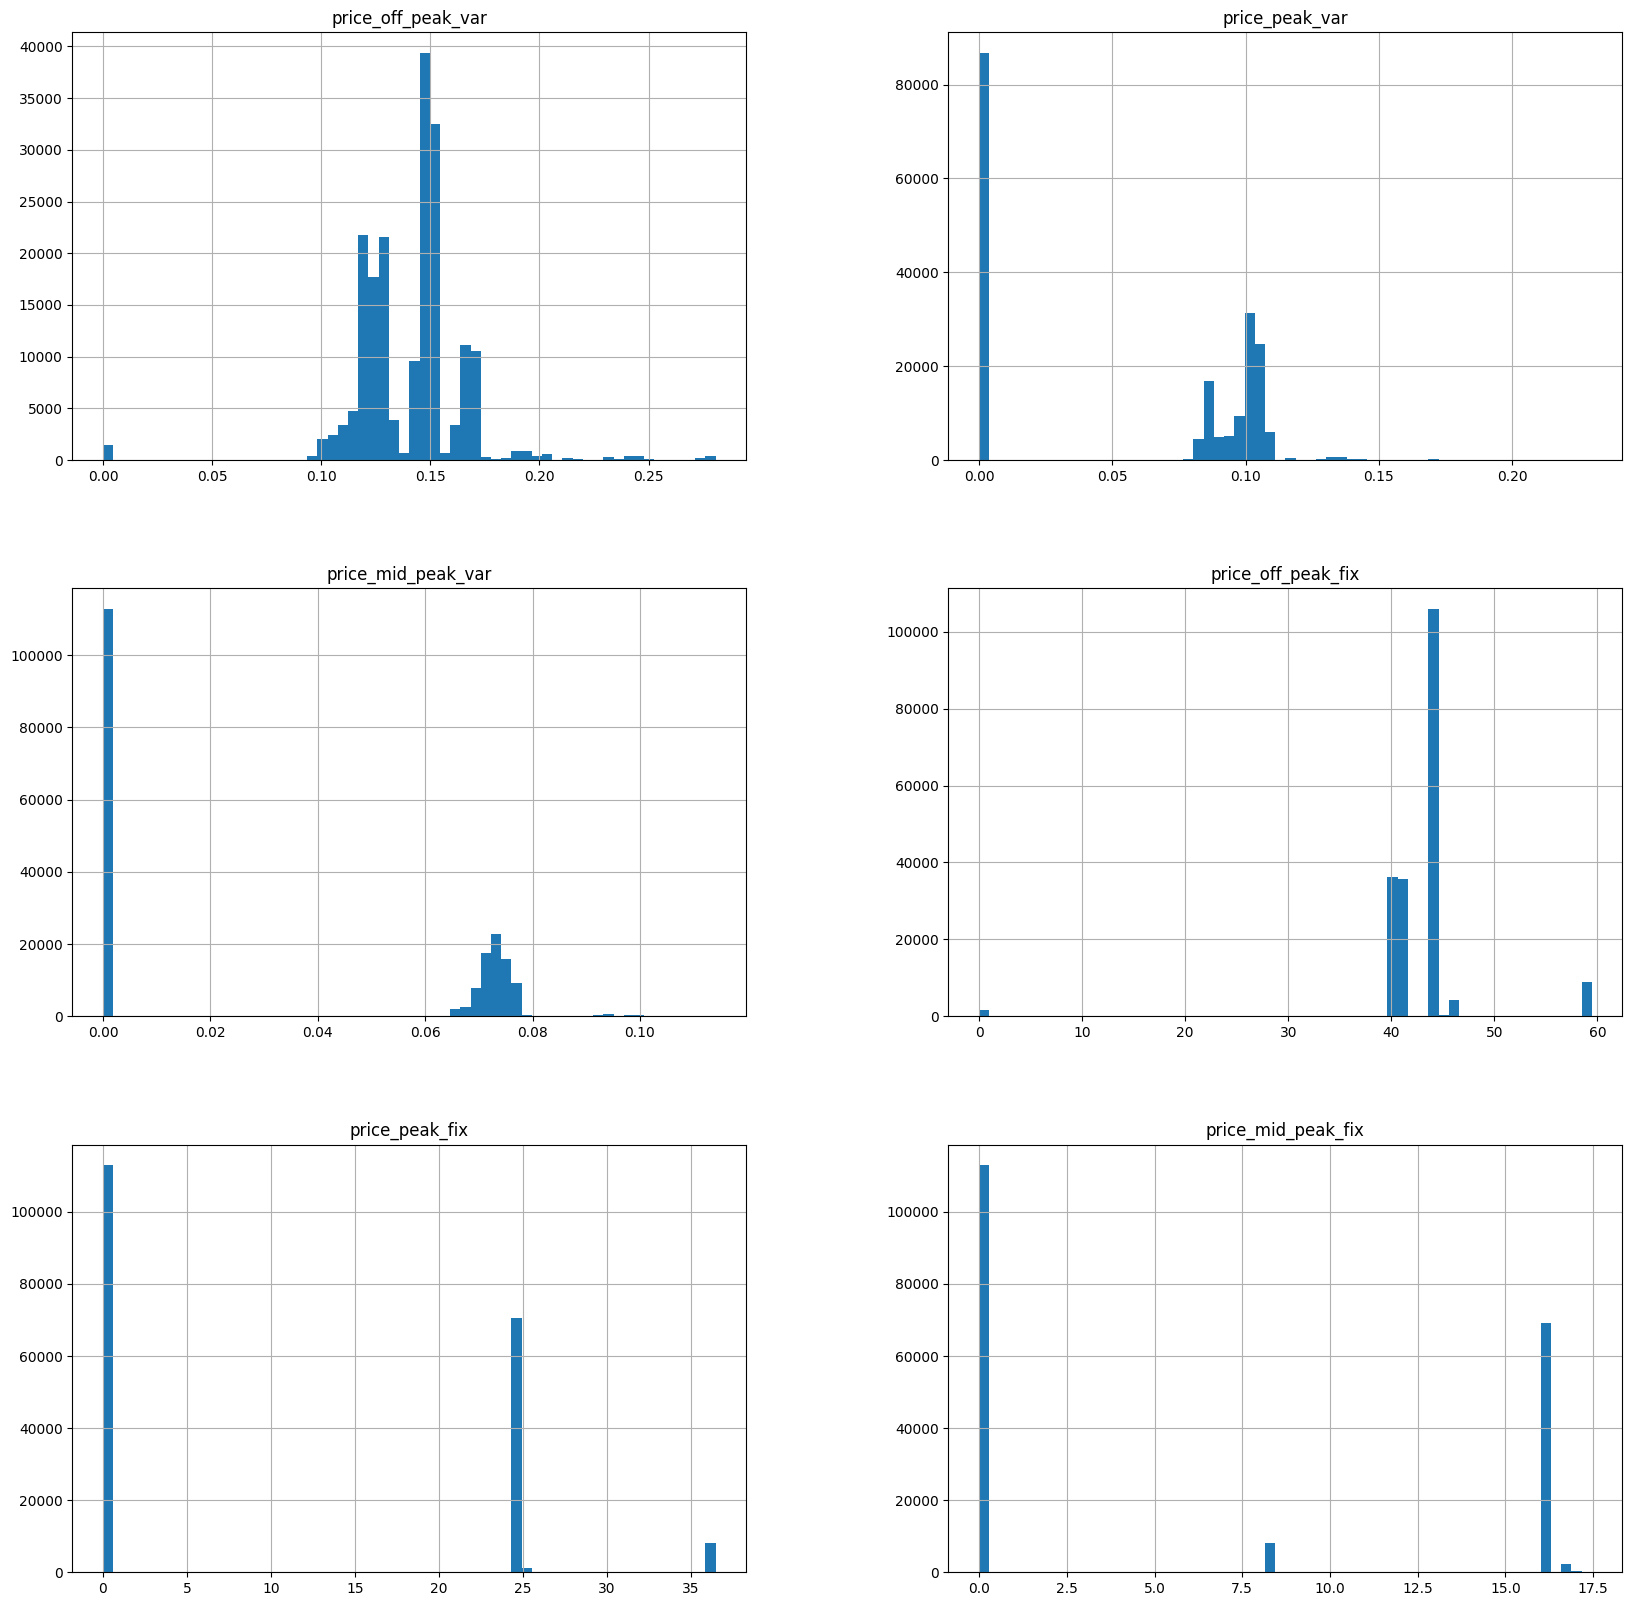

In [40]:
price.hist(bins=60,figsize=(20,20))

In [41]:
price_merged = price.merge(client[['id','churn']],on='id',how='inner')
price_merged

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0


In [42]:
# churned group
churned_grp = price_merged[price_merged['churn']==1]
churned_grp

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
36,7363a2ebfbb3148c8ef6d25323e4093a,2015-01-01,0.127710,0.105130,0.073270,40.565969,24.339581,16.226389,1
37,7363a2ebfbb3148c8ef6d25323e4093a,2015-02-01,0.127710,0.105130,0.073270,40.565969,24.339581,16.226389,1
38,7363a2ebfbb3148c8ef6d25323e4093a,2015-03-01,0.127710,0.105130,0.073270,40.565969,24.339581,16.226389,1
39,7363a2ebfbb3148c8ef6d25323e4093a,2015-04-01,0.127710,0.105130,0.073270,40.565969,24.339581,16.226389,1
40,7363a2ebfbb3148c8ef6d25323e4093a,2015-05-01,0.125388,0.102808,0.070948,40.565969,24.339581,16.226389,1
...,...,...,...,...,...,...,...,...,...
174988,418a0468ae49a62c13cab1ad86b6e4d1,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555,1
174989,418a0468ae49a62c13cab1ad86b6e4d1,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555,1
174990,418a0468ae49a62c13cab1ad86b6e4d1,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555,1
174991,418a0468ae49a62c13cab1ad86b6e4d1,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555,1


In [43]:
# unchurned group
unchurned_grp = price_merged[price_merged['churn']==0]
unchurned_grp

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0


Text(0.5, 1.0, 'variable energy price at peak period')

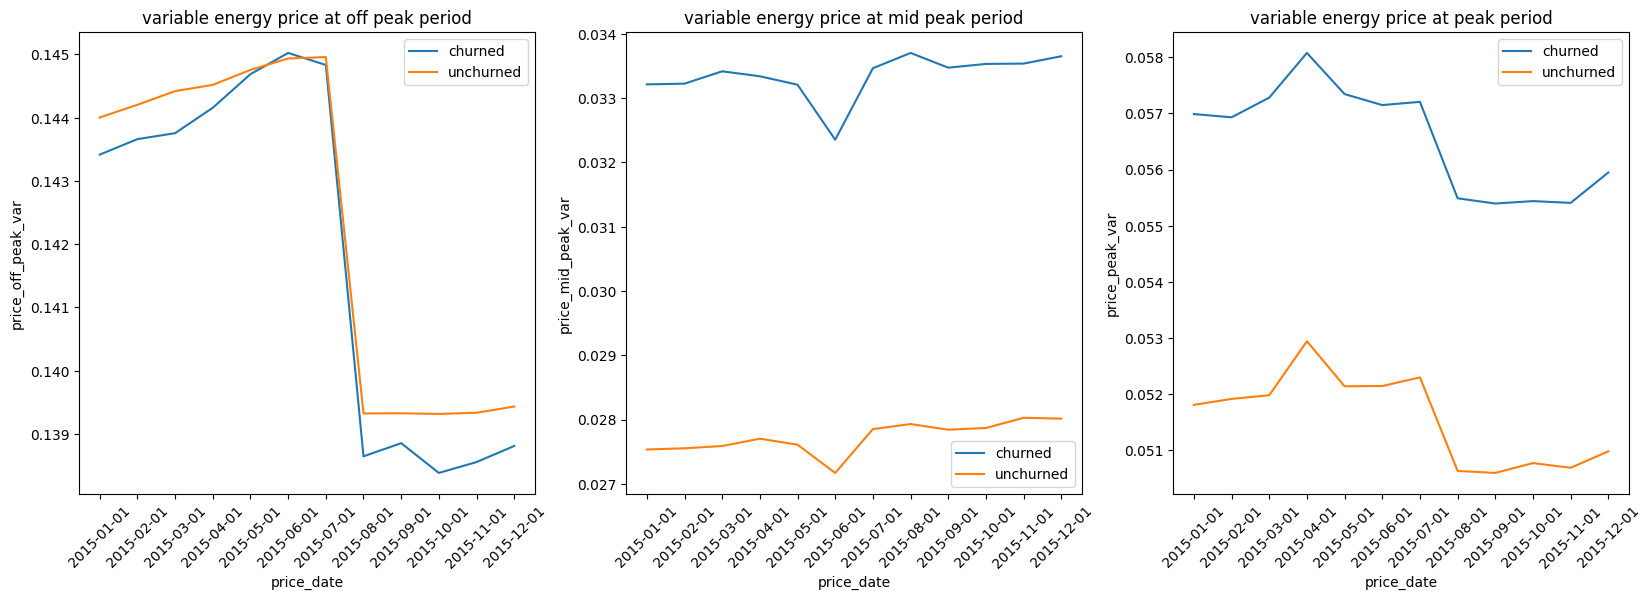

In [44]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.lineplot(data=churned_grp,x=churned_grp['price_date'],y=churned_grp['price_off_peak_var'],label='churned',errorbar=None)
sns.lineplot(data=unchurned_grp,x=unchurned_grp['price_date'],y=unchurned_grp['price_off_peak_var'],label='unchurned',errorbar=None)
plt.xticks(rotation=45)
plt.title('variable energy price at off peak period')
plt.subplot(1,3,2)
sns.lineplot(data=churned_grp,x=churned_grp['price_date'],y=churned_grp['price_mid_peak_var'],label='churned',errorbar=None)
sns.lineplot(data=unchurned_grp,x=unchurned_grp['price_date'],y=unchurned_grp['price_mid_peak_var'],label='unchurned',errorbar=None)
plt.xticks(rotation=45)
plt.title('variable energy price at mid peak period')
plt.subplot(1,3,3)
sns.lineplot(data=churned_grp,x=churned_grp['price_date'],y=churned_grp['price_peak_var'],label='churned',errorbar=None)
sns.lineplot(data=unchurned_grp,x=unchurned_grp['price_date'],y=unchurned_grp['price_peak_var'],label='unchurned',errorbar=None)
plt.xticks(rotation=45)
plt.title('variable energy price at peak period')

Text(0.5, 1.0, 'fix energy price at peak period')

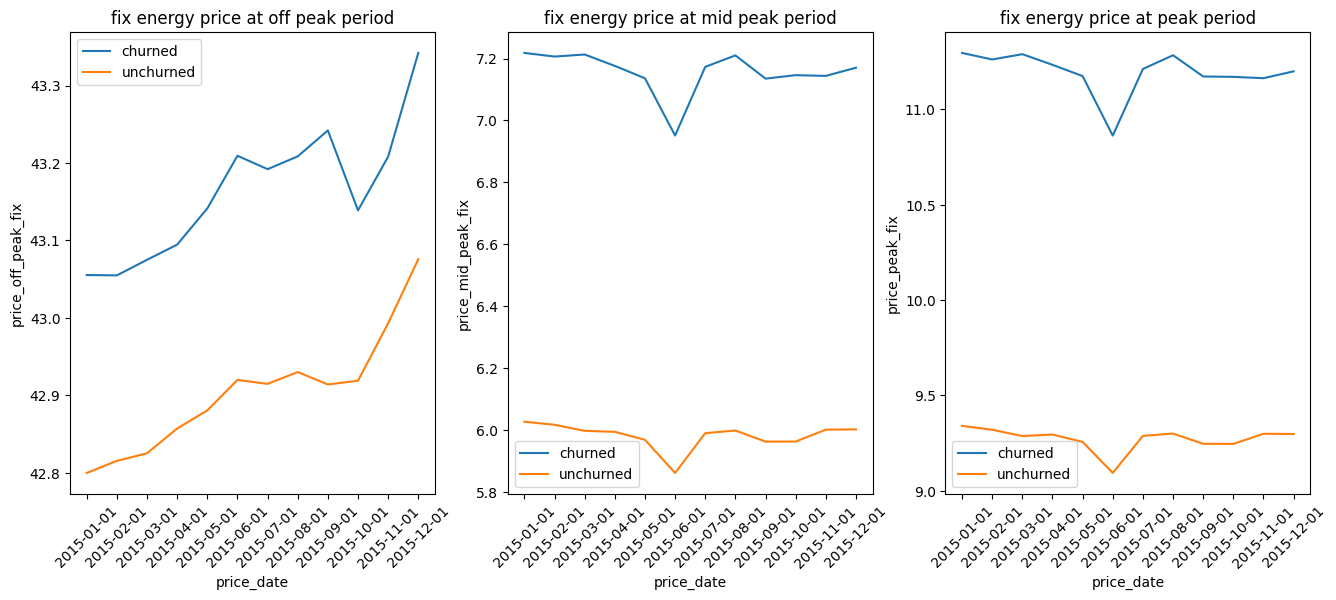

In [45]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.lineplot(data=churned_grp,x=churned_grp['price_date'],y=churned_grp['price_off_peak_fix'],label='churned',errorbar=None)
sns.lineplot(data=unchurned_grp,x=unchurned_grp['price_date'],y=unchurned_grp['price_off_peak_fix'],label='unchurned',errorbar=None)
plt.xticks(rotation=45)
plt.title('fix energy price at off peak period')
plt.subplot(1,3,2)
sns.lineplot(data=churned_grp,x=churned_grp['price_date'],y=churned_grp['price_mid_peak_fix'],label='churned',errorbar=None)
sns.lineplot(data=unchurned_grp,x=unchurned_grp['price_date'],y=unchurned_grp['price_mid_peak_fix'],label='unchurned',errorbar=None)
plt.xticks(rotation=45)
plt.title('fix energy price at mid peak period')
plt.subplot(1,3,3)
sns.lineplot(data=churned_grp,x=churned_grp['price_date'],y=churned_grp['price_peak_fix'],label='churned',errorbar=None)
sns.lineplot(data=unchurned_grp,x=unchurned_grp['price_date'],y=unchurned_grp['price_peak_fix'],label='unchurned',errorbar=None)
plt.xticks(rotation=45)
plt.title('fix energy price at peak period')

In [46]:
price_correlation=price.loc[:,'price_off_peak_var':].corr()
price_correlation

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_off_peak_var,1.000000,-0.328580,-0.594872,0.417097,-0.630018,-0.572229
price_peak_var,-0.328580,1.000000,0.821353,-0.098627,0.796097,0.807759
price_mid_peak_var,-0.594872,0.821353,1.000000,-0.137848,0.973960,0.979717
price_off_peak_fix,0.417097,-0.098627,-0.137848,1.000000,-0.000428,-0.252661
price_peak_fix,-0.630018,0.796097,0.973960,-0.000428,1.000000,0.927308
price_mid_peak_fix,-0.572229,0.807759,0.979717,-0.252661,0.927308,1.000000


<Axes: >

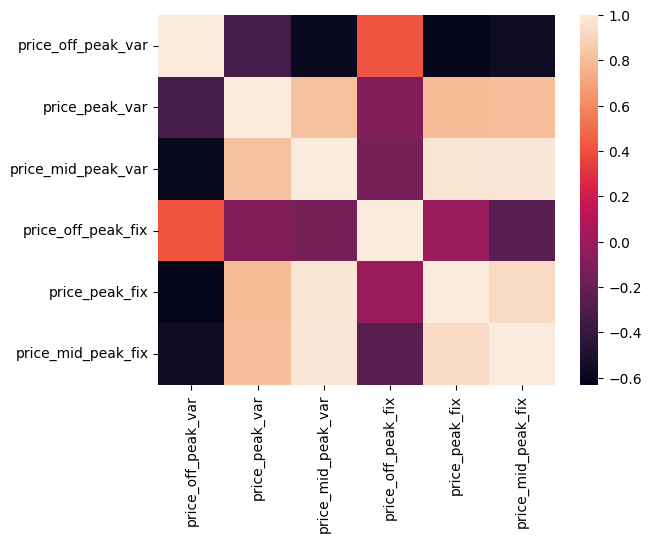

In [47]:
sns.heatmap(data=price_correlation)

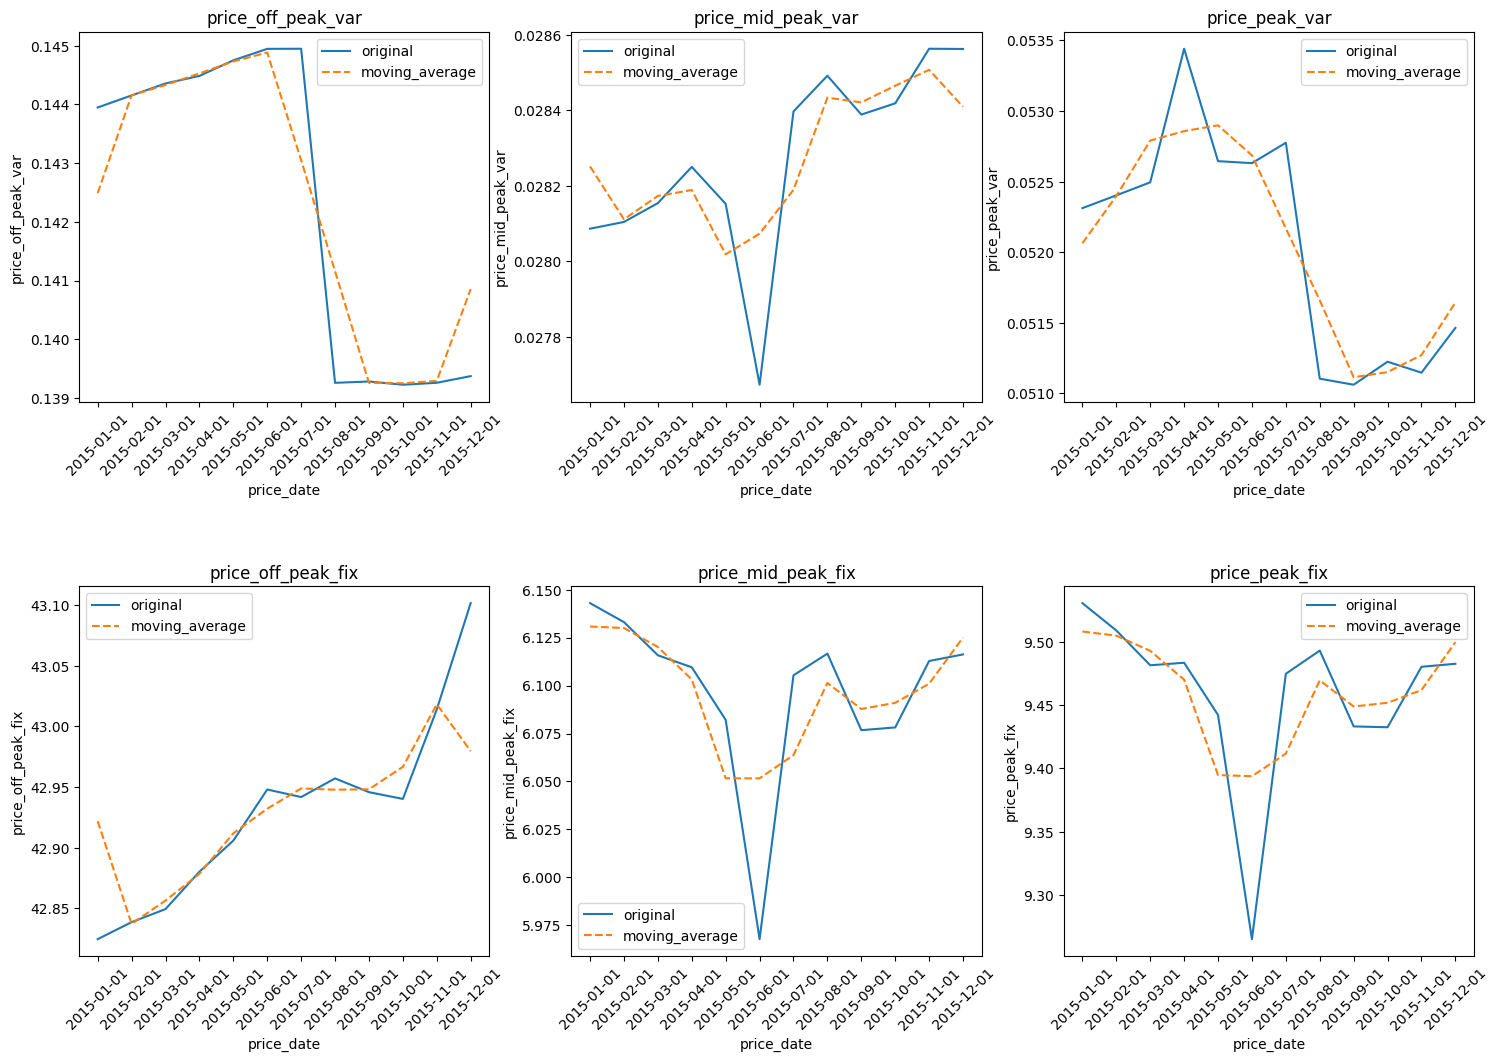

In [48]:
ma_price_columns = ['price_off_peak_var','price_mid_peak_var','price_peak_var','price_off_peak_fix','price_mid_peak_fix','price_peak_fix']
plt.figure(figsize=(18,12))
for i,col in enumerate(ma_price_columns):
    price_merged[col + '_ma'] = price_merged[col].rolling(window = 3,center=True,min_periods=1).mean()
    plt.subplot(2,3,i+1)
    sns.lineplot(x=price_merged['price_date'],y=price_merged[col],errorbar=None,label='original')
    sns.lineplot(x=price_merged['price_date'],y=price_merged[col + '_ma'],errorbar=None,linestyle='dashed',label='moving_average')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.2)

In [49]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(index=price_merged['price_date'],constant=True,order=1,drop=True)
x = dp.in_sample()

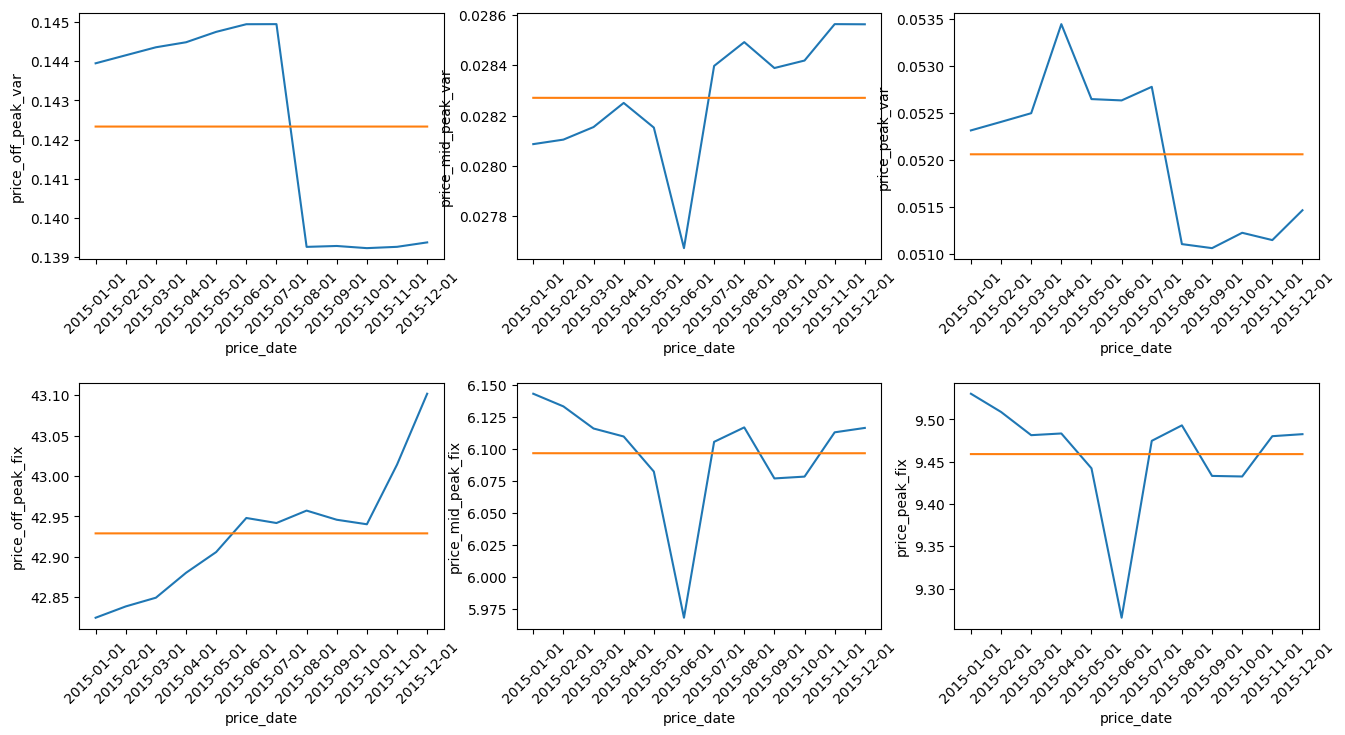

In [50]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(16,8))
for i,col in enumerate(ma_price_columns):
    y = price_merged[col]
    model = LinearRegression(fit_intercept=False)
    model.fit(x,y)
    y_pred = pd.Series(model.predict(x),index=x.index)
    plt.subplot(2,3,i+1)
    sns.lineplot(x=price_merged['price_date'],y=price_merged[col],errorbar=None)
    sns.lineplot(data=y_pred,errorbar=None)
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.2)

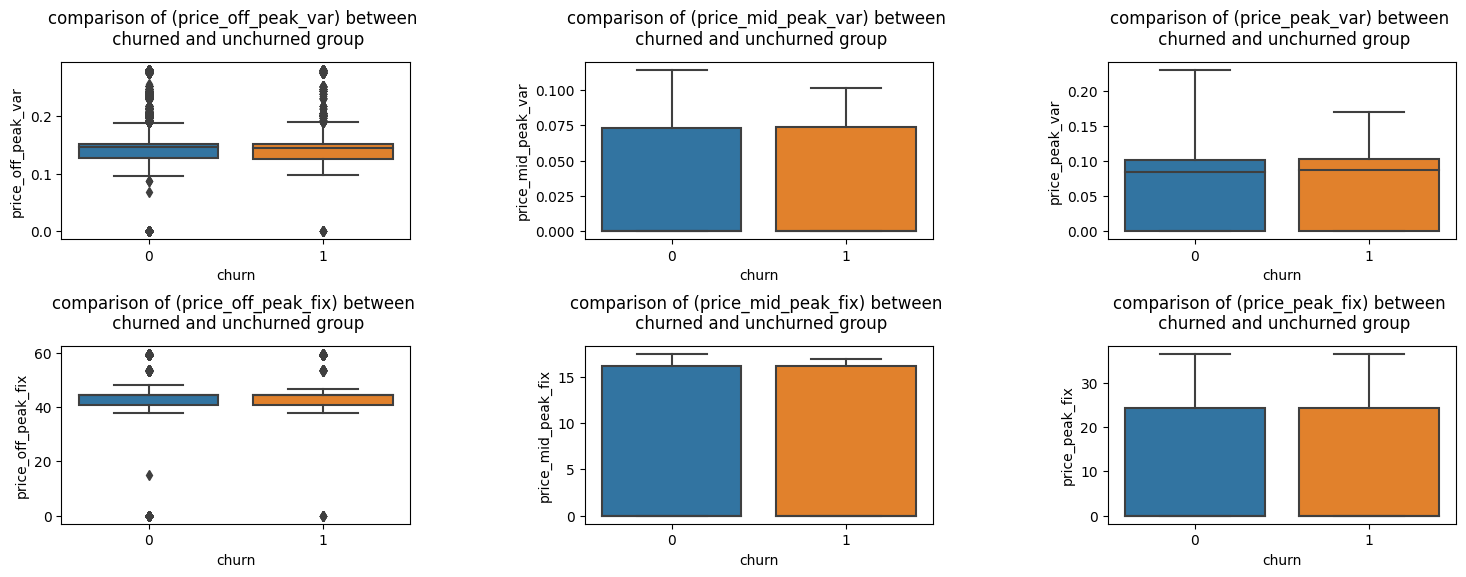

In [51]:
plt.figure(figsize=(18,6))
for i,col in enumerate(ma_price_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=price_merged['churn'],y=price_merged[col])
    plt.title('comparison of ('+ col +') between \n churned and unchurned group',y=1.05)
    plt.subplots_adjust(wspace=0.5)
    plt.subplots_adjust(hspace=0.6)

# Feature Engineering

In [52]:
client['date_activ'] = pd.to_datetime(client['date_activ'],format='%Y-%m-%d')
client['date_end'] = pd.to_datetime(client['date_end'],format='%Y-%m-%d')
client['date_modif_prod'] = pd.to_datetime(client['date_modif_prod'],format='%Y-%m-%d')
client['date_renewal'] = pd.to_datetime(client['date_renewal'],format='%Y-%m-%d')
price['price_date'] = pd.to_datetime(price['price_date'],format='%Y-%m-%d')

Calculated average prices in different periods

In [53]:
average_price = price.groupby('id').agg({'price_off_peak_var':'mean','price_peak_var':'mean','price_mid_peak_var':'mean',
                                          'price_off_peak_fix':'mean','price_peak_fix':'mean','price_mid_peak_fix':'mean'}).add_prefix('average_')
average_price.reset_index()

,id,average_price_off_peak_var,average_price_peak_var,average_price_mid_peak_var,average_price_off_peak_fix,average_price_peak_fix,average_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


Calculate annual price difference by subtracting price in January from price in December

In [54]:
jan_price = price.groupby('id').first().add_prefix('jan_').drop(columns='jan_price_date')
dec_price = price.groupby('id').last().add_prefix('dec_').drop(columns='dec_price_date')
merged_price = jan_price.merge(dec_price,on='id')
annual_price_diff = pd.DataFrame()
for col in price.columns[2:]:
    annual_price_diff[f'{col}_diff'] = merged_price[f'dec_{col}'] - merged_price[f'jan_{col}']
annual_price_diff = annual_price_diff.drop(annual_price_diff.columns[:-6],axis=1).reset_index()
annual_price_diff

,id,price_off_peak_var_diff,price_peak_var_diff,price_mid_peak_var_diff,price_off_peak_fix_diff,price_peak_fix_diff,price_mid_peak_fix_diff
0,0002203ffbb812588b632b9e628cc38d,-0.006192,-0.002302,0.003487,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,0.000000,0.000000,1.500000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,-0.005120,0.000763,0.162916,0.097749,0.065166
4,00114d74e963e47177db89bc70108537,-0.003994,0.000000,0.000000,-0.000001,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.038788,-0.022735,-0.335085,-0.400251,-0.432834
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.000000,0.000000,0.177779,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,-0.003707,-0.007326,0.164916,0.099749,0.067166
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,-0.004937,0.001029,0.162916,0.097749,0.065166


Merge the 2 datasets 

In [55]:
final_price_table = annual_price_diff.merge(average_price,on='id')
final_price_table

,id,price_off_peak_var_diff,price_peak_var_diff,price_mid_peak_var_diff,price_off_peak_fix_diff,price_peak_fix_diff,price_mid_peak_fix_diff,average_price_off_peak_var,average_price_peak_var,average_price_mid_peak_var,average_price_off_peak_fix,average_price_peak_fix,average_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,-0.006192,-0.002302,0.003487,0.162916,0.097749,0.065166,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.000000,0.000000,0.177779,0.000000,0.000000,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,0.000000,0.000000,1.500000,0.000000,0.000000,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,-0.005120,0.000763,0.162916,0.097749,0.065166,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,-0.003994,0.000000,0.000000,-0.000001,0.000000,0.000000,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.038788,-0.022735,-0.335085,-0.400251,-0.432834,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.000000,0.000000,0.177779,0.000000,0.000000,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,-0.003707,-0.007326,0.164916,0.099749,0.067166,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,-0.004937,0.001029,0.162916,0.097749,0.065166,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [56]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,end_year,end_month,sub_year,sub_month
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2016,6,2013,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2016,8,2009,8
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2016,4,2010,4
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2016,3,2010,3
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2016,3,2010,1


In [57]:
client = client.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
client

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,end_year,end_month,sub_year,sub_month
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2016,6,2013,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2016,8,2009,8
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2016,4,2010,4
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2016,3,2010,3
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2016,3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,4648.01,0,0.0,18.57,0.138305,...,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,2016,5,2012,5
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,631.69,181,0.0,144.03,0.100167,...,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,2016,8,2012,8
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,190.39,179,0.0,129.60,0.116900,...,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,2016,2,2012,2
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,19.34,0,0.0,7.18,0.145711,...,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,2016,8,2012,8


In [58]:
final_dataset = final_price_table.merge(client,on='id')
final_dataset

,id,price_off_peak_var_diff,price_peak_var_diff,price_mid_peak_var_diff,price_off_peak_fix_diff,price_peak_fix_diff,price_mid_peak_fix_diff,average_price_off_peak_var,average_price_peak_var,average_price_mid_peak_var,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,end_year,end_month,sub_year,sub_month
0,0002203ffbb812588b632b9e628cc38d,-0.006192,-0.002302,0.003487,0.162916,0.097749,0.065166,0.124338,0.103794,0.073160,...,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,0,2016,2,2010,1
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.000000,0.000000,0.177779,0.000000,0.000000,0.146426,0.000000,0.000000,...,1,61.58,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2016,6,2009,8
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,0.000000,0.000000,1.500000,0.000000,0.000000,0.181558,0.000000,0.000000,...,2,81.61,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,0,2016,5,2013,2
3,00114d74e963e47177db89bc70108537,-0.003994,0.000000,0.000000,-0.000001,0.000000,0.000000,0.147926,0.000000,0.000000,...,1,157.99,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2016,3,2010,3
4,0013f326a839a2f6ad87a1859952d227,-0.006171,-0.002351,0.003371,0.000000,0.000000,0.000000,0.126076,0.105542,0.074921,...,1,341.58,3,lxidpiddsbxsbosboudacockeimpuepw,20.000,0,2016,2,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,-0.010493,-0.004812,-0.000447,0.162916,0.097749,0.065166,0.122426,0.102375,0.072210,...,1,742.37,11,ldkssxwpmemidmecebumciepifcamkci,34.640,0,2016,9,2005,4
14602,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.000000,0.000000,0.177779,0.000000,0.000000,0.147137,0.000000,0.000000,...,1,191.60,5,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,2016,9,2010,9
14603,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,-0.003707,-0.007326,0.164916,0.099749,0.067166,0.153879,0.129497,0.094842,...,2,351.39,3,lxidpiddsbxsbosboudacockeimpuepw,16.500,0,2016,6,2013,6
14604,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,-0.004937,0.001029,0.162916,0.097749,0.065166,0.123858,0.103499,0.073735,...,3,361.40,4,lxidpiddsbxsbosboudacockeimpuepw,31.500,0,2016,9,2011,9


The dataset is separated into input features and target variable. Also i have encoded the categorical variables.

In [59]:
X=final_dataset.iloc[:,1:].copy()
y=X.pop('churn')
for col in X.select_dtypes('object'):
    X[col],_ = X[col].factorize()
X

,price_off_peak_var_diff,price_peak_var_diff,price_mid_peak_var_diff,price_off_peak_fix_diff,price_peak_fix_diff,price_mid_peak_fix_diff,average_price_off_peak_var,average_price_peak_var,average_price_mid_peak_var,average_price_off_peak_fix,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,end_year,end_month,sub_year,sub_month
0,-0.006192,-0.002302,0.003487,0.162916,0.097749,0.065166,0.124338,0.103794,0.073160,40.701732,...,43.08,1,81.42,6,0,17.250,2016,2,2010,1
1,-0.004104,0.000000,0.000000,0.177779,0.000000,0.000000,0.146426,0.000000,0.000000,44.385450,...,24.42,1,61.58,6,0,13.200,2016,6,2009,8
2,0.050443,0.000000,0.000000,1.500000,0.000000,0.000000,0.181558,0.000000,0.000000,45.319710,...,38.58,2,81.61,3,1,13.856,2016,5,2013,2
3,-0.003994,0.000000,0.000000,-0.000001,0.000000,0.000000,0.147926,0.000000,0.000000,44.266930,...,29.76,1,157.99,6,0,13.200,2016,3,2010,3
4,-0.006171,-0.002351,0.003371,0.000000,0.000000,0.000000,0.126076,0.105542,0.074921,40.728885,...,30.00,1,341.58,3,1,20.000,2016,2,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,-0.010493,-0.004812,-0.000447,0.162916,0.097749,0.065166,0.122426,0.102375,0.072210,40.606699,...,13.02,1,742.37,11,2,34.640,2016,9,2005,4
14602,-0.003778,0.000000,0.000000,0.177779,0.000000,0.000000,0.147137,0.000000,0.000000,44.311375,...,12.98,1,191.60,5,1,15.000,2016,9,2010,9
14603,-0.001760,-0.003707,-0.007326,0.164916,0.099749,0.067166,0.153879,0.129497,0.094842,41.160171,...,45.36,2,351.39,3,1,16.500,2016,6,2013,6
14604,-0.009391,-0.004937,0.001029,0.162916,0.097749,0.065166,0.123858,0.103499,0.073735,40.606699,...,19.68,3,361.40,4,1,31.500,2016,9,2011,9


# Model Building

**Random Forest Model:**

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8)

In [61]:
from sklearn.ensemble import RandomForestClassifier
initial_model = RandomForestClassifier(n_estimators=500)
initial_model.fit(X_train,y_train)
y_pred = initial_model.predict(X_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
f1_score(y_val,y_pred)

0.1201201201201201

The dataset we have is highly imbalanced. So we need to perform techniques like over sampling, under sampling, and smote to make an equal representation of the churned class and unchurned class to remove any kind of bias in the prediction of customer churning.

In [63]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler()
X_train_ros,y_train_ros = ros.fit_resample(X_train,y_train)
rus = RandomUnderSampler()
X_train_rus,y_train_rus = rus.fit_resample(X_train_ros,y_train_ros)

final_model= RandomForestClassifier()
final_model.fit(X_train_rus,y_train_rus)
y_pred_final = final_model.predict(X_val)
y_pred_final

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
f1_score(y_val,y_pred_final)

0.21546961325966849

In [65]:
score = cross_val_score(final_model,X,y,cv= 5,scoring='f1')
score.mean()

0.15873592307469053

'              precision    recall  f1-score   support\n\n           0       0.91      0.99      0.95      2613\n           1       0.74      0.13      0.22       309\n\n    accuracy                           0.90      2922\n   macro avg       0.82      0.56      0.58      2922\nweighted avg       0.89      0.90      0.87      2922\n'

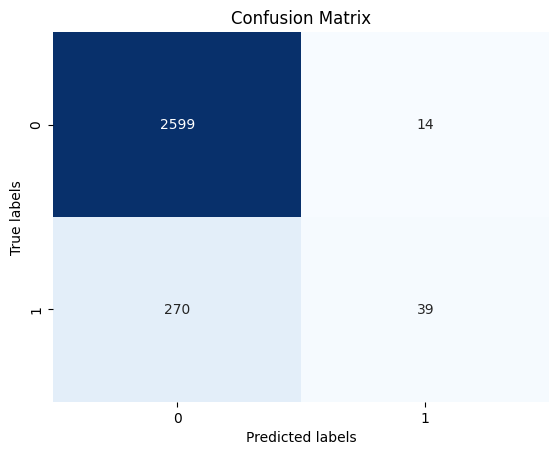

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix,classification_report
roc_auc_score(y_val,y_pred_final)
fpr,tpr,threshold = roc_curve(y_val,y_pred_final)
#plt.plot(fpr,tpr)
cm = confusion_matrix(y_val,y_pred_final)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
classification_report(y_val,y_pred_final)

<Axes: >

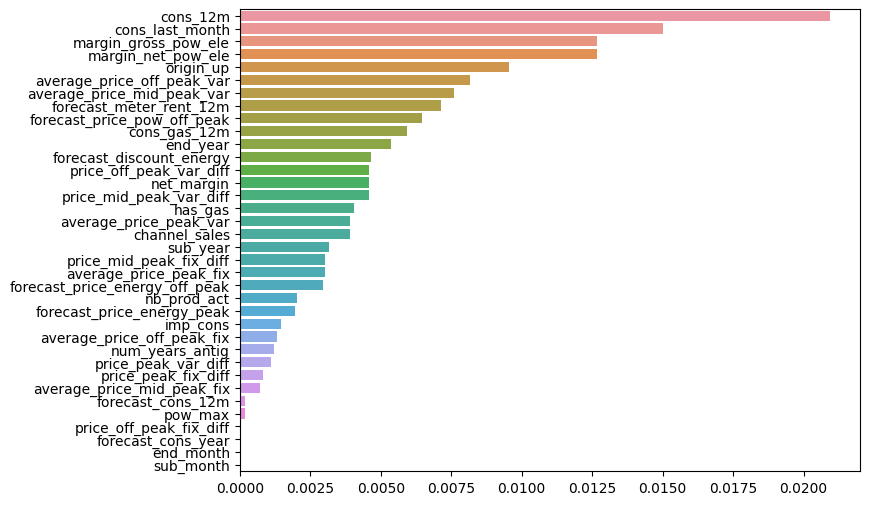

In [67]:
from sklearn.feature_selection import mutual_info_classif
mi_score = mutual_info_classif(X,y)
mi_scores = pd.Series(mi_score,index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores
plt.figure(figsize=(8,6))
sns.barplot(y=mi_scores.index,x=mi_scores,orient='h')

**Churn Rate:** 
    • Moderate at 9.72%, signaling the need for retention strategies.

**Early Churn:** 
    • Critical, with 75% leaving within the initial 6 years, emphasizing early customer engagement.

**Consumption Pattern:**
    • Electricity consumers (10%) exhibit higher churn than gas 
    consumers (8.2%).

**Temporal Anomaly**:
    • 93% of churn occurred in 2016, necessitating investigation into that period.

**Customer Acquisition:**
    • Peak between 2009-2013, suggesting a need to revisit strategies from that time.
    
**Pricing Influence:**
    • Minimal, indicating non-price factors impact churn more significantly.

In summary, targeted efforts in early engagement, understanding consumption nuances, investigating anomalies in 2016, and revisiting strategies from peak acquisition years are recommended for effective customer retention.